In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "E"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  E ['INSTRUÇÕES', 'Clínquer', '121', '178']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('E', '121', array(['CPIIE40'], dtype=object)),
 ('E', '178', array(['CPIII32'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIE40': 1, 'CPIII32': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1143 non-null   object        
 1   (Data, Produção)                             1143 non-null   datetime64[ns]
 2   (Horário, Produção)                          1143 non-null   object        
 3   (Data, Medida)                               1143 non-null   datetime64[ns]
 4   (Horário, Medida)                            1143 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        1143 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  1143 non-null   int64         
 7   (Obs., Unnamed: 8_level_2)                   1143 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 71.6+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  476 non-null    float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 62.6 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                48 non-null     object 
 1   MgO                529 non-null    object 
 2   Na2O               48 non-null     object 
 3   Al2O3              48 non-null     object 
 4   SiO2               48 non-null     object 
 5   SO3                1049 non-null   object 
 6   K2O                48 non-null     object 
 7   TiO2               0 non-null      float64
 8   Fe2O3              48 non-null     object 
 9   Perda ao fogo      1139 non-null   object 
 10  Resíduo insolúvel  1135 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 107.3+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          476 non-null    float64
 1   C2S total          476 non-null    float64
 2   C2S alpha          476 non-null    float64
 3   C2S beta           476 non-null    float64
 4   C2S gama           476 non-null    float64
 5   C4AF               987 non-null    object 
 6   C3A                987 non-null    object 
 7   C3A cubic          987 non-null    object 
 8   C3A orto           987 non-null    object 
 9   CaO livre          987 non-null    object 
 10  Portlandita        987 non-null    object 
 11  Periclasio         987 non-null    object 
 12  Arcanita           987 non-null    object 
 13  Aphthalita         987 non-null    object 
 14  Langbeinita        987 non-null    object 
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          987 n

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1138 non-null   object 
 1   (Unnamed: 137_level_1, #200)              1134 non-null   object 
 2   (Unnamed: 138_level_1, #325)              1134 non-null   object 
 3   (Unnamed: 139_level_1, #400)              511 non-null    object 
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 53.7+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1136 non-null   object 
 1   (Tempo de pega, Fim)              1136 non-null   object 
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   1140 non-null   object 
 4   (Resistência à compressão, 7 d)   1141 non-null   object 
 5   (Resistência à compressão, 28 d)  1142 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 62.6+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1143 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1143 non-null   object 
 2   (Data, Produção)                                              1143 non-null   object 
 3   (Horário, Produção)                                           1143 non-null   object 
 4   (Data, Medida)                                                1143 non-null   object 
 5   (Horário, Medida)                                             1143 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1143 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   1143 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Clínquer": "Clinker",
    "Fíler calcário": "Calcareous filler",
    "Cinza volante": "Fly ash",
    "Escória": "Slag",
    "Argila calcinada": "Calcined clay",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Clinker",
    "Calcareous filler",
    "Fly ash",
    "Slag",
    "Calcined clay",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1142, 54)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant   City       Date  Clinker  Calcareous filler  Fly ash  Slag  \
0     E  Pecém 2021-01-05      NaN                NaN      NaN   NaN   
1     E  Pecém 2021-01-06      NaN                NaN      NaN   NaN   
2     E  Pecém 2021-01-07      NaN                NaN      NaN   NaN   
3     E  Pecém 2021-01-08      NaN                NaN      NaN   NaN   
4     E  Pecém 2021-01-09      NaN                NaN      NaN   NaN   

   Calcined clay  Calcium sulfate (composition)  Total C3S  ...  #325  #400  \
0            NaN                            NaN        NaN  ...  0.87   NaN   
1            NaN                           2.40      48.69  ...  0.87   NaN   
2            NaN                           2.65      45.47  ...  1.00   NaN   
3            NaN                           3.16      48.70  ...  0.97   NaN   
4            NaN                           4.17      45.77  ...  0.79   NaN   

   Specific Gravity  Initial setting time  Final setting time  CS1   CS3  \
0               NaN                 150.0               210.0  NaN  32.9   
1               NaN                 145.0               205.0  NaN  31.9   
2               NaN                 150.0               215.0  NaN  31.8   
3               NaN                 150.0               210.0  NaN  31.1   
4               NaN                 145.0               205.0  NaN  31.4   

    CS7   CS28        Cement_Type  
0  38.8  47.05  CP II-E40Expedido  
1  37.0  48.07  CP II-E40Expedido  
2  37.0  48.39  CP II-E40Expedido  
3  36.1  48.26  CP II-E40Expedido  
4  37.6  48.02  CP II-E40Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant   City       Date  Clinker  Calcareous filler  Fly ash  Slag  \
1137     E  Pecém 2023-08-04      NaN                NaN      NaN   NaN   
1138     E  Pecém 2023-08-05      NaN                NaN      NaN   NaN   
1139     E  Pecém 2023-08-08      NaN                NaN      NaN   NaN   
1140     E  Pecém 2023-08-09      NaN                NaN      NaN   NaN   
1141     E  Pecém 2023-08-10      NaN                NaN      NaN   NaN   

      Calcined clay  Calcium sulfate (composition)  Total C3S  ...  #325  \
1137            NaN                            NaN        NaN  ...   NaN   
1138            NaN                            NaN        NaN  ...   NaN   
1139            NaN                            NaN        NaN  ...   NaN   
1140            NaN                            NaN        NaN  ...   NaN   
1141            NaN                            NaN        NaN  ...   NaN   

       #400  Specific Gravity  Initial setting time  Final setting time  CS1  \
1137  0.237               NaN                 275.0               360.0  NaN   
1138  0.285               NaN                 265.0               330.0  NaN   
1139  0.190               NaN                 270.0               350.0  NaN   
1140  0.230               NaN                 260.0               335.0  NaN   
1141  0.280               NaN                 270.0               340.0  NaN   

            CS3        CS7  CS28       Cement_Type  
1137  16.820000  29.410000   NaN  CP III32Expedido  
1138  16.530001  28.690001   NaN  CP III32Expedido  
1139  17.740000        NaN   NaN  CP III32Expedido  
1140  14.970000        NaN   NaN  CP III32Expedido  
1141  15.080000        NaN   NaN  CP III32Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          1142 non-null   object        
 1   City                           1142 non-null   object        
 2   Date                           1142 non-null   datetime64[ns]
 3   Clinker                        0 non-null      float64       
 4   Calcareous filler              0 non-null      float64       
 5   Fly ash                        0 non-null      float64       
 6   Slag                           0 non-null      float64       
 7   Calcined clay                  0 non-null      float64       
 8   Calcium sulfate (composition)  475 non-null    float64       
 9   Total C3S                      475 non-null    float64       
 10  Total C2S                      475 non-null    float64       
 11  Alpha C2S        

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                             1142  2022-05-19 01:54:44.763572736   
Clinker                           0.0                            NaN   
Calcareous filler                 0.0                            NaN   
Fly ash                           0.0                            NaN   
Slag                              0.0                            NaN   
Calcined clay                     0.0                            NaN   
Calcium sulfate (composition)   475.0                       3.426211   
Total C3S                       475.0                      46.227053   
Total C2S                       475.0                       9.454442   
Alpha C2S                       475.0                       0.444821   
Beta C2S                        475.0                       8.938421   
Gamma C2S                       475.0                       0.061347   
C4AF                            925.0                       5.719416   
C3A                             925.0                       1.707578   
Cubic C3A                       925.0                       1.620724   
Orthorhombic C3A                925.0                       0.086941   
Free CaO                        925.0                       0.875427   
Portlandite                     925.0                       0.656703   
Periclase                       925.0                       1.010789   
Arcanite                        925.0                       0.149838   
Aphthitalite                    925.0                       0.459589   
Langbeinite                     925.0                       0.243514   
Calcium sulfate                   0.0                            NaN   
Bassanite                       925.0                       0.285081   
Anhydrite                       475.0                       0.031284   
Calcite                         925.0                       5.635578   
Dolimita                        925.0                       1.169751   
Quartz                          925.0                       1.119103   
Muscovite                         0.0                            NaN   
CaO                               0.0                            NaN   
MgO                             504.0                       1.401111   
Na2O                              0.0                            NaN   
Al2O3                             0.0                            NaN   
SiO2                              0.0                            NaN   
SO3                             860.0                       3.161105   
K2O                               0.0                            NaN   
TiO2                              0.0                            NaN   
Fe2O3                             0.0                            NaN   
Loss on Ignition               1067.0                       3.616635   
Insoluble Residue               899.0                       4.041446   
Blaine                         1118.0                    4447.181574   
#200                            620.0                        0.15761   
#325                            625.0                       0.968352   
#400                            498.0                       0.807193   
Specific Gravity                  0.0                            NaN   
Initial setting time           1121.0                          210.0   
Final setting time             1122.0                     281.557932   
CS1                               0.0                            NaN   
CS3                            1132.0                      23.950062   
CS7                            1129.0                      32.961791   
CS28                           1101.0                      44.069813   

                                               min                  25%  \
Date                           2021-01-05 00:00:00  2021-11-03 06:00:00   
Clinker                                        NaN                  NaN   
Calcareous filler                              NaN            

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top  freq  \
Plant        1142      1                  E  1142   
City         1142      1              Pecém  1142   
Date         1142    NaN                NaN   NaN   
Cement_Type  1142      2  CP II-E40Expedido   631   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2022-05-19 01:54:44.763572736  2021-01-05 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-11-03 06:00:00  2022-05-30 00:00:00  2022-11-25 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-08-17 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['E'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-E40Expedido', 'CP III32Expedido'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Pecém'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
E    1142
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP II-E40Expedido    631
CP III32Expedido     511
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Pecém    1142
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1406786/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


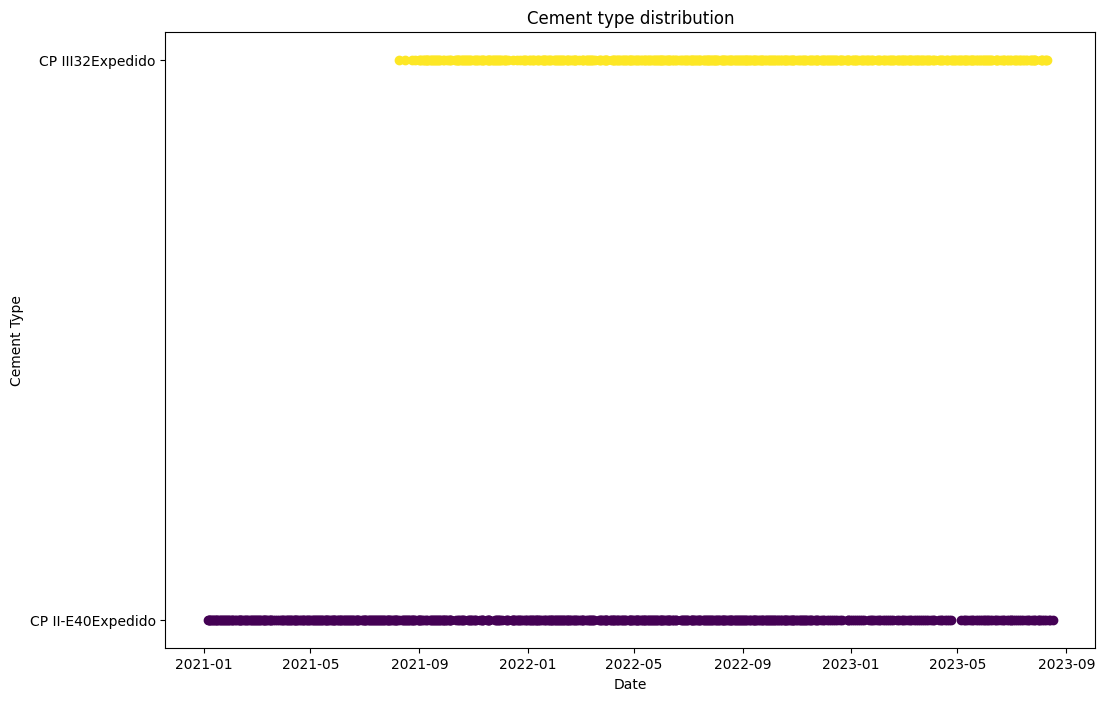

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-E40Expedido
CP III32Expedido


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-E-40    631
CP III-32     511
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1406786/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


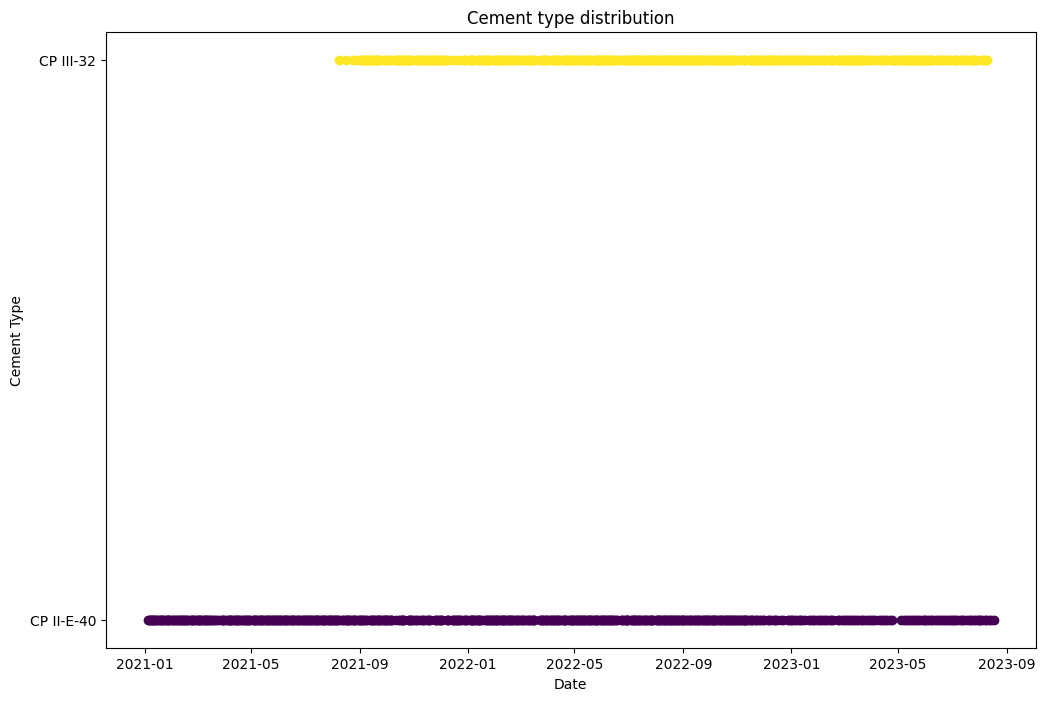

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

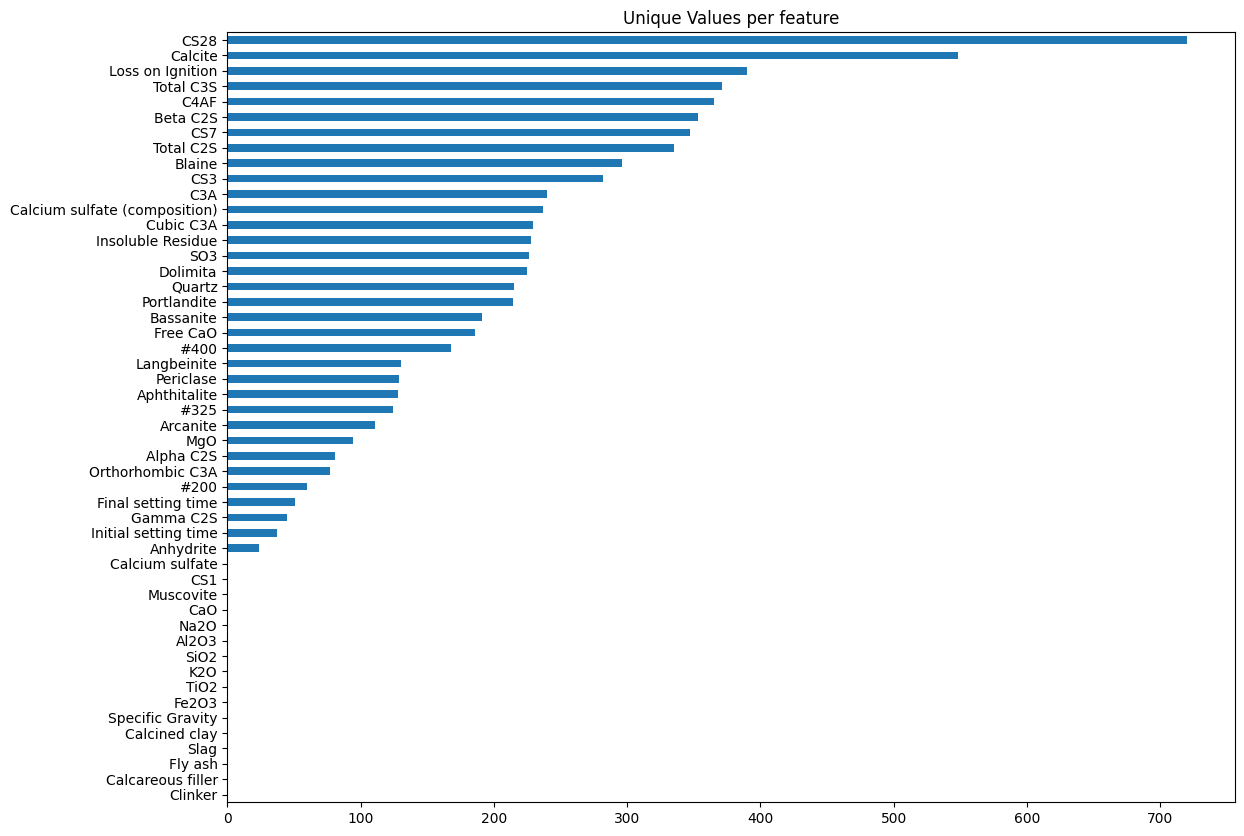

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

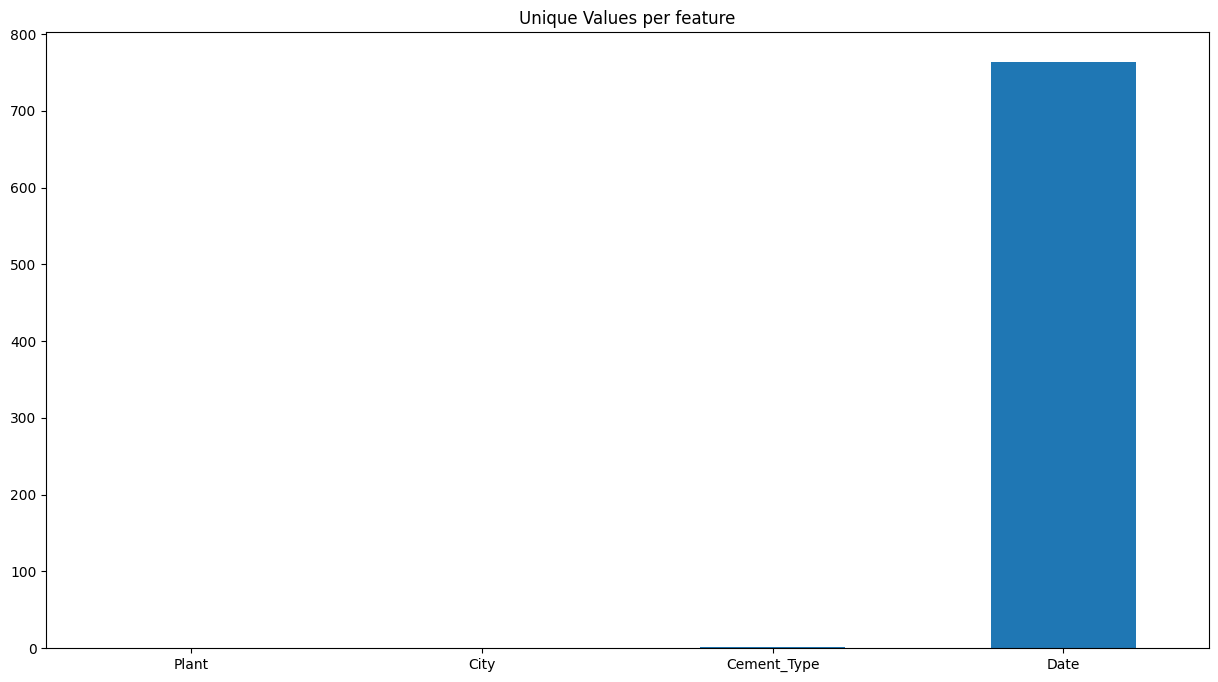

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

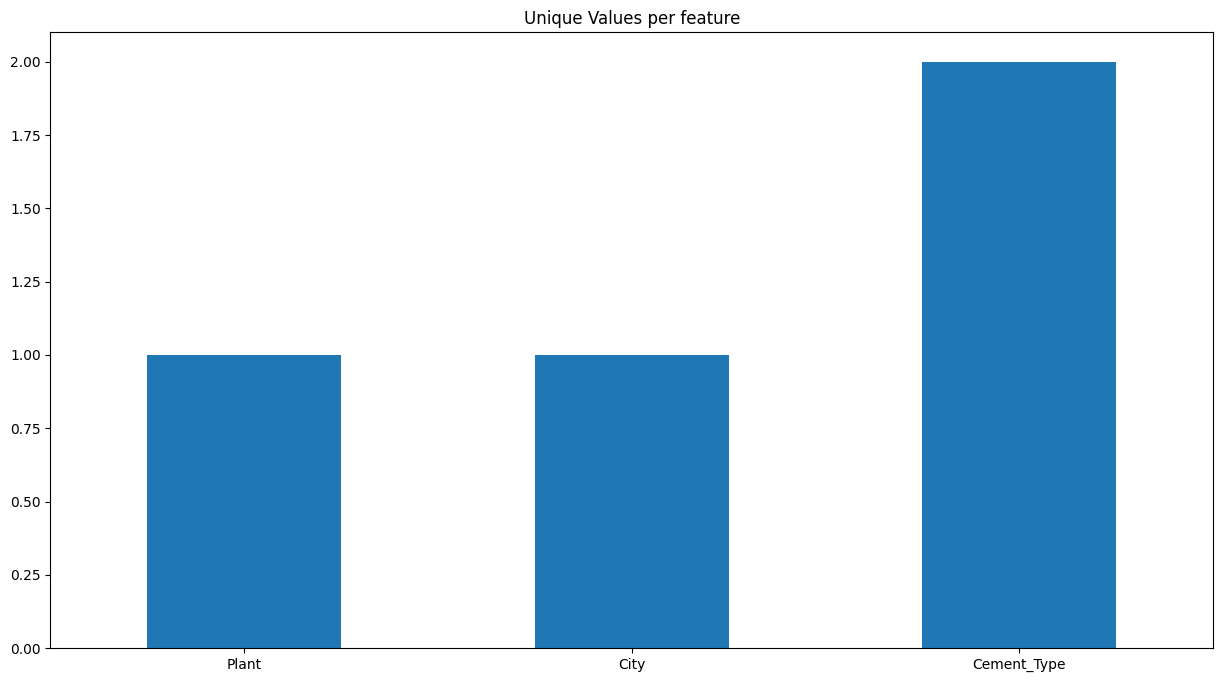

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 50 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clinker                           True
Calcareous filler                 True
Fly ash                           True
Slag                              True
Calcined clay                     True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

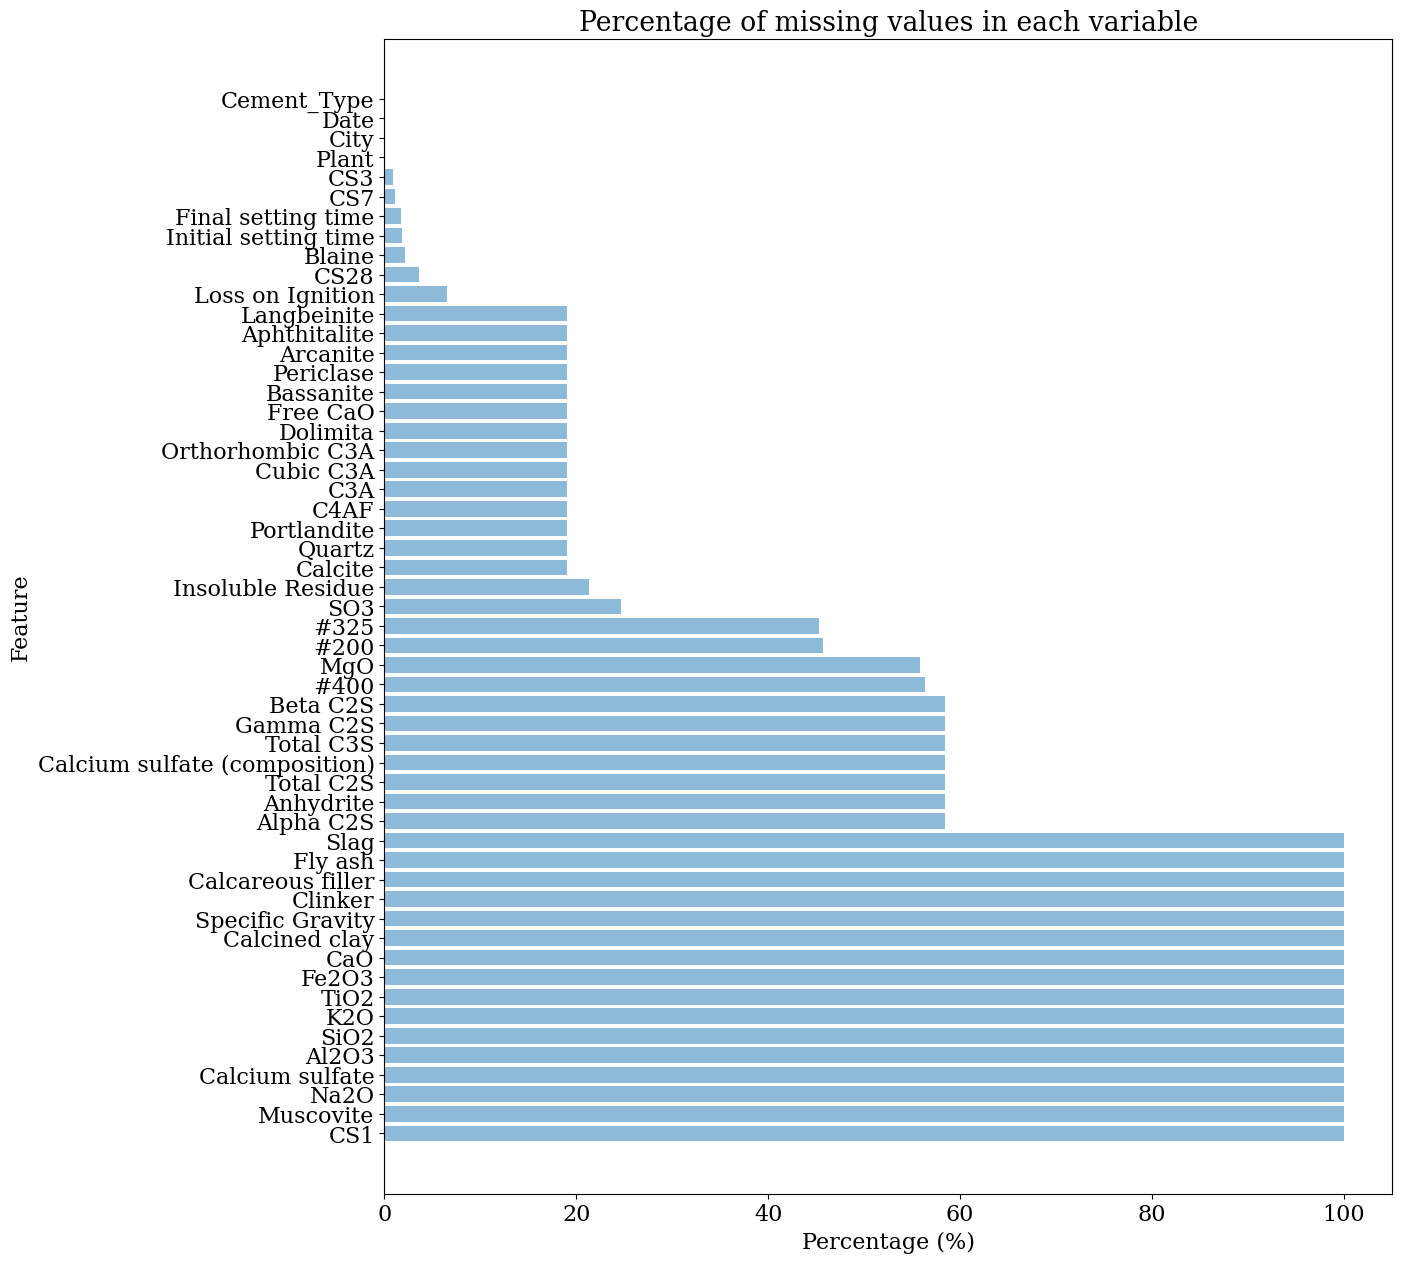

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clinker', 'Calcareous filler', 'Fly ash', 'Slag', 'Calcined clay',
       'Calcium sulfate (composition)', 'Total C3S', 'Total C2S', 'Alpha C2S',
       'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A', 'Cubic C3A', 'Orthorhombic C3A',
       'Free CaO', 'Portlandite', 'Periclase', 'Arcanite', 'Aphthitalite',
       'Langbeinite', 'Calcium sulfate', 'Bassanite', 'Anhydrite', 'Calcite',
       'Dolimita', 'Quartz', 'Muscovite', 'CaO', 'MgO', 'Na2O', 'Al2O3',
       'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3', 'Loss on Ignition',
       'Insoluble Residue', 'Blaine', '#200', '#325', '#400',
       'Specific Gravity', 'Initial setting time', 'Final setting time', 'CS1',
       'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for E
Anhydrite                           35.551664
Gamma C2S                           27.583187
Orthorhombic C3A                    22.591944
Arcanite                            11.908932
Bassanite                            9.894921
Dolimita                             6.392294
Alpha C2S                            4.115587
SO3                                  3.327496
Langbeinite                          2.101576
Aphthitalite                         1.401051
Quartz                               0.087566
#200                                 0.087566
Initial setting time                 0.000000
SiO2                                 0.000000
K2O                                  0.000000
CS7                                  0.000000
CS3                                  0.000000
TiO2                                 0.000000
Fe2O3                                0.000000
CS1                                  0.000000
Specific Gravity                     0.000000
Loss on Ignition                     0.000000
Insoluble Residue                    0.000000
Na2O                                 0.000000
Blaine                               0.000000
#325                                 0.000000
Final setting time                   0.000000
#400                                 0.000000
Al2O3                                0.000000
Clinker                              0.000000
MgO                                  0.000000
CaO                                  0.000000
Fly ash                              0.000000
Slag                                 0.000000
Calcined clay                        0.000000
Calcium sulfate (composition)        0.000000
Total C3S                            0.000000
Total C2S                            0.000000
Beta C2S                             0.000000
C4AF                                 0.000000
C3A                                  0.000000
Cubic C3A                            0.000000
Free CaO                             0.000000
Portlandite                          0.000000
Periclase                            0.000000
Calcium sulfate                      0.000000
Calcite                              0.000000
Calcareous filler                    0.000000
Muscovite                            0.000000
CS28                                 0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

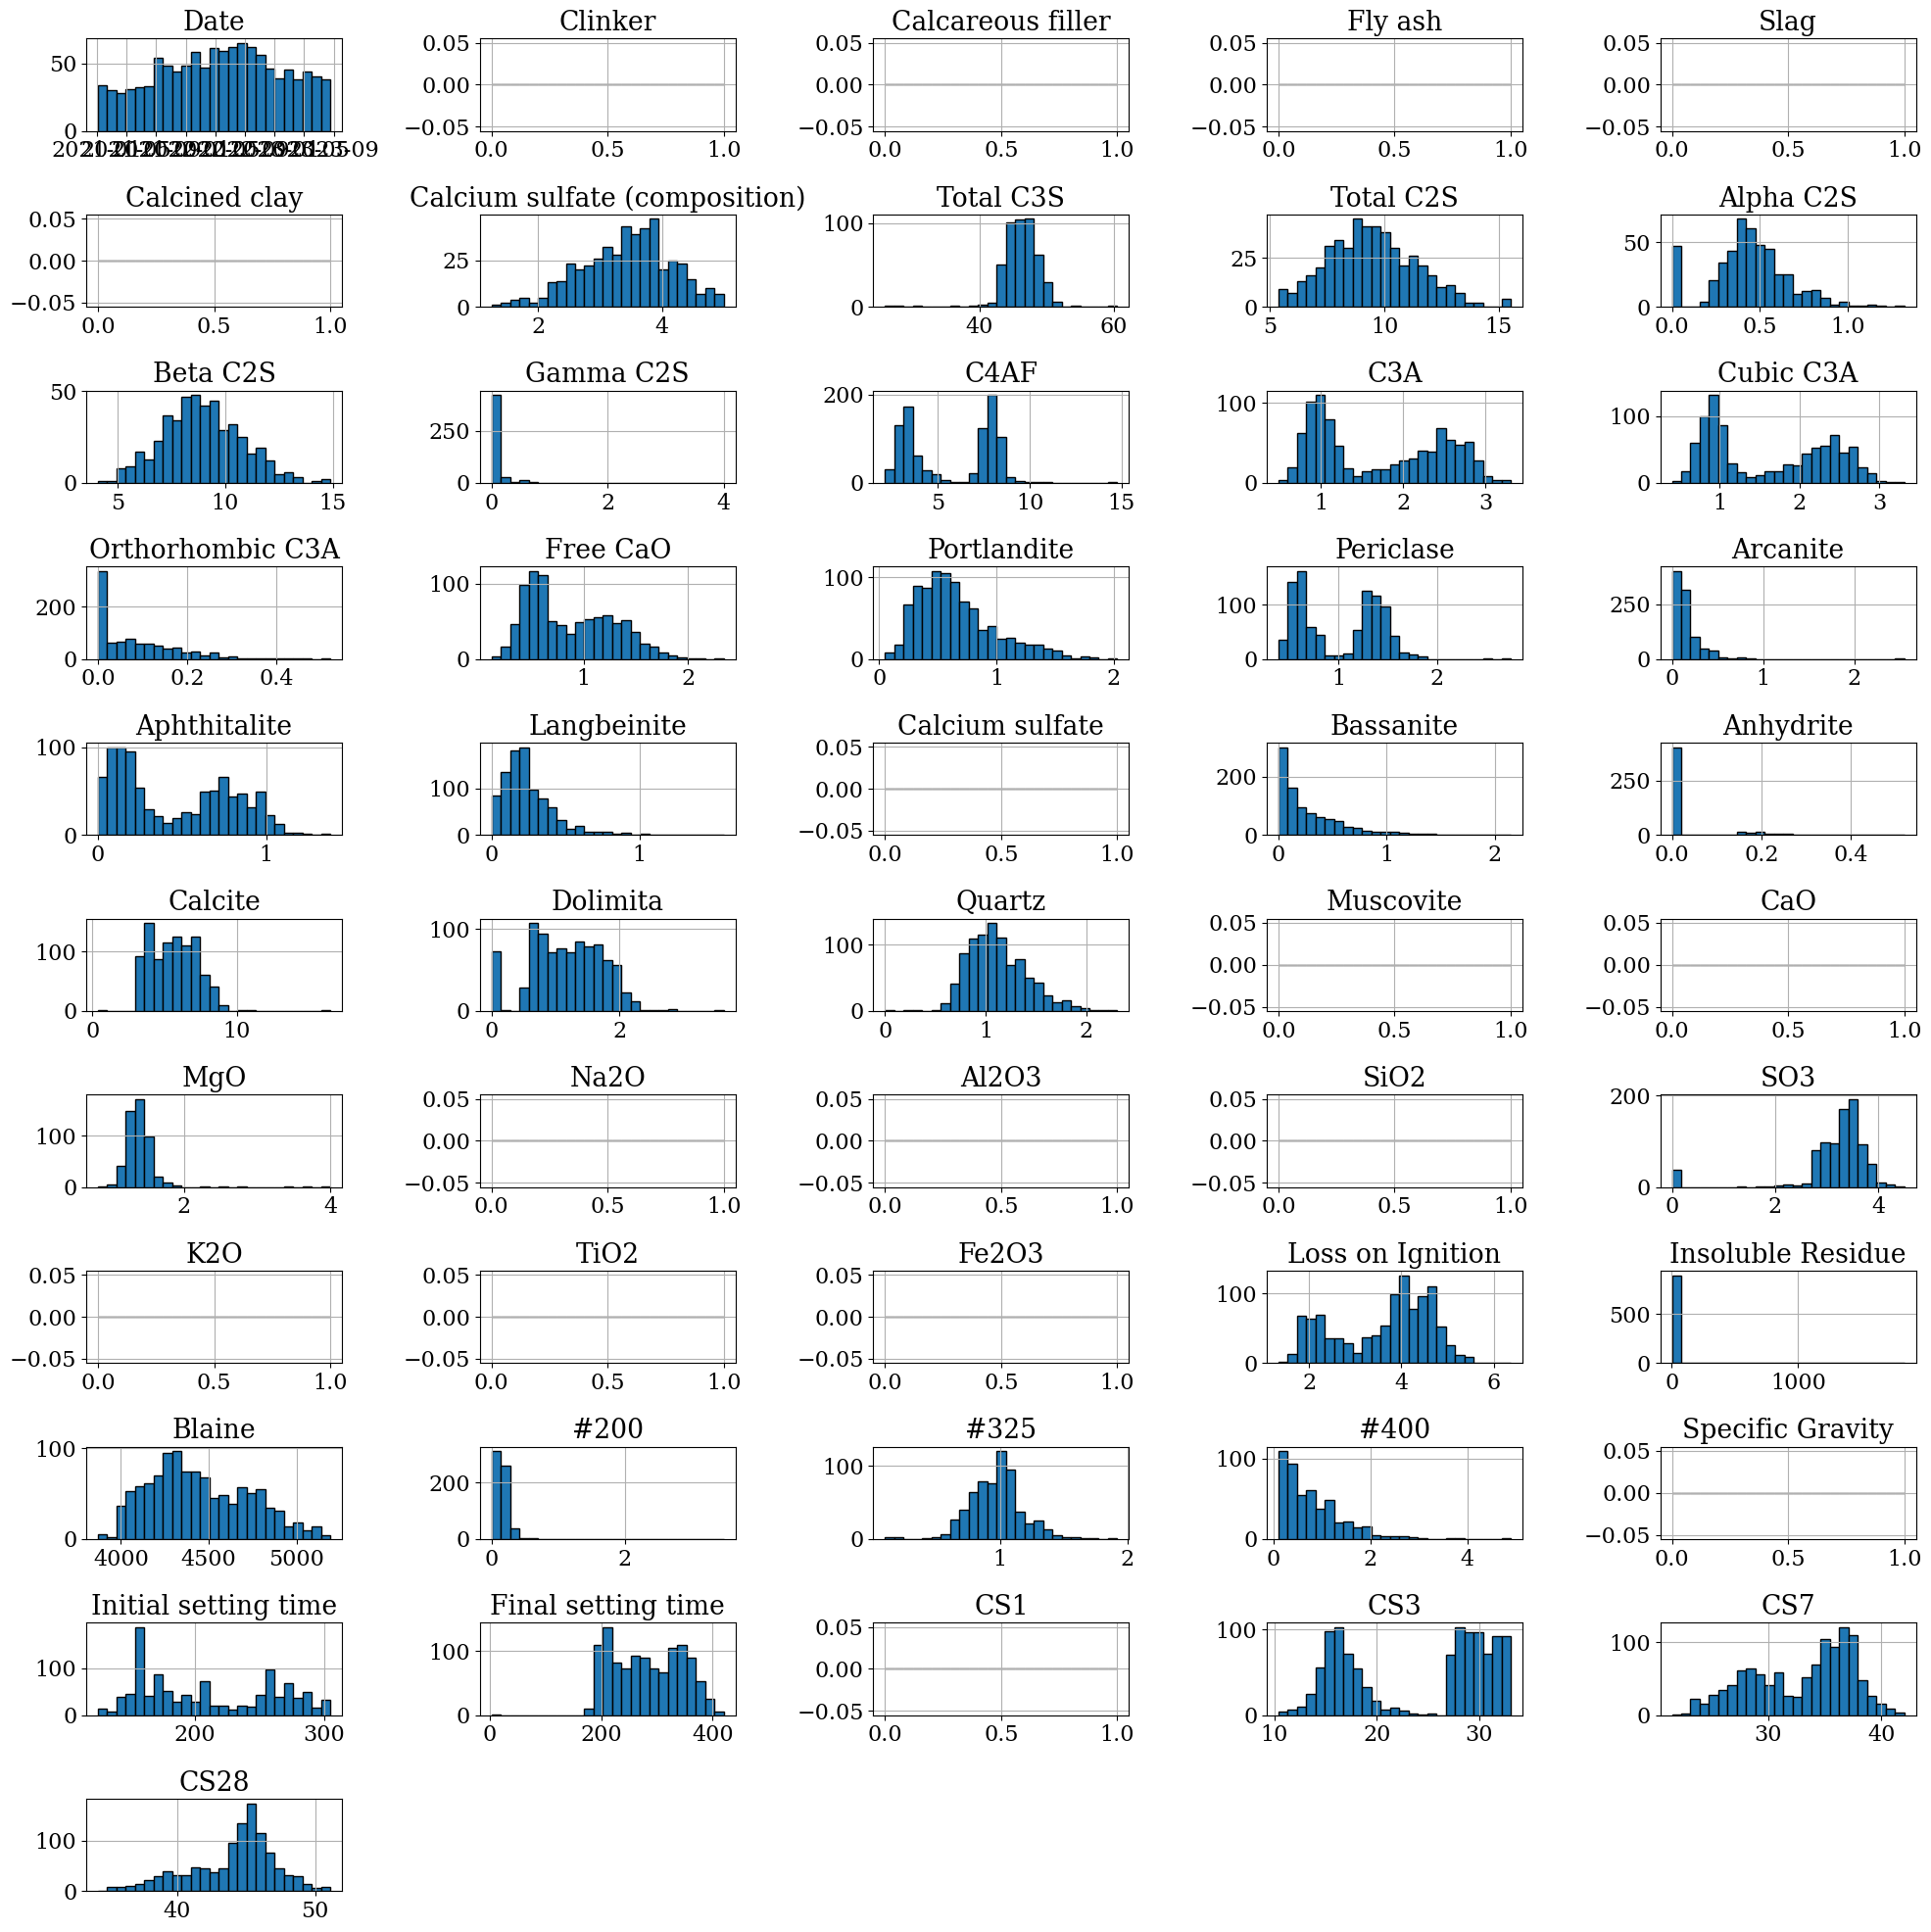

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

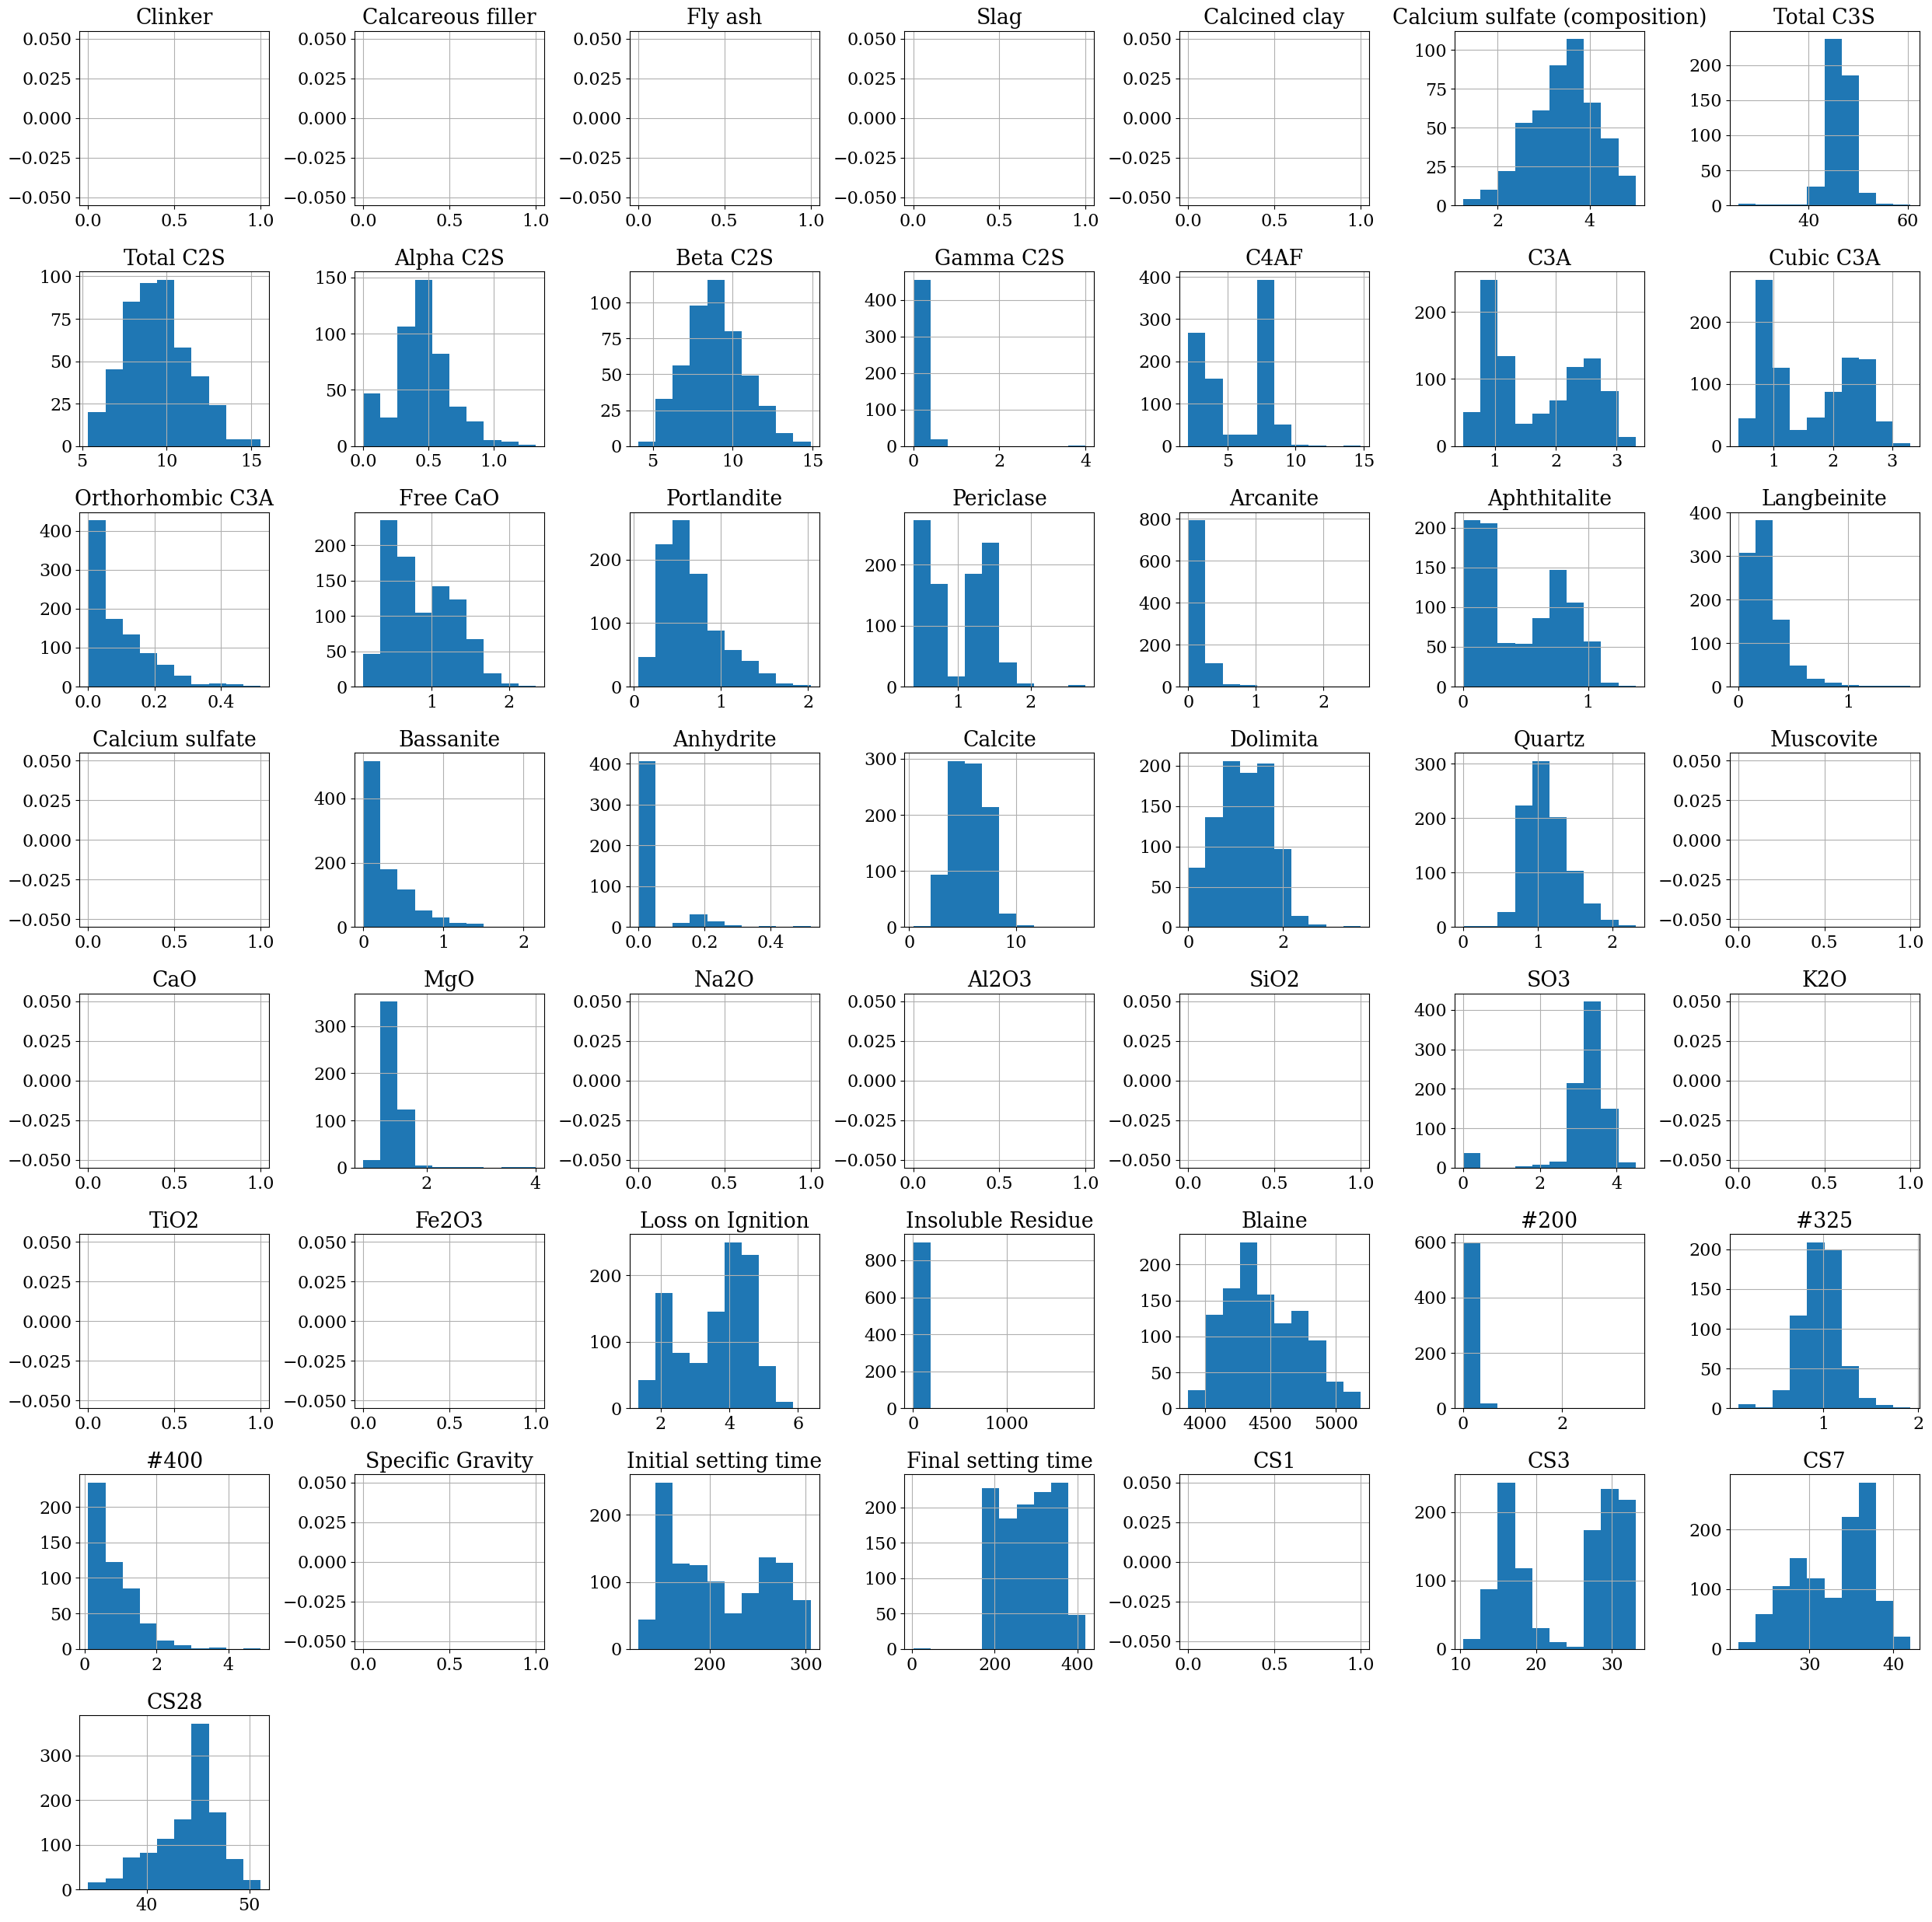

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

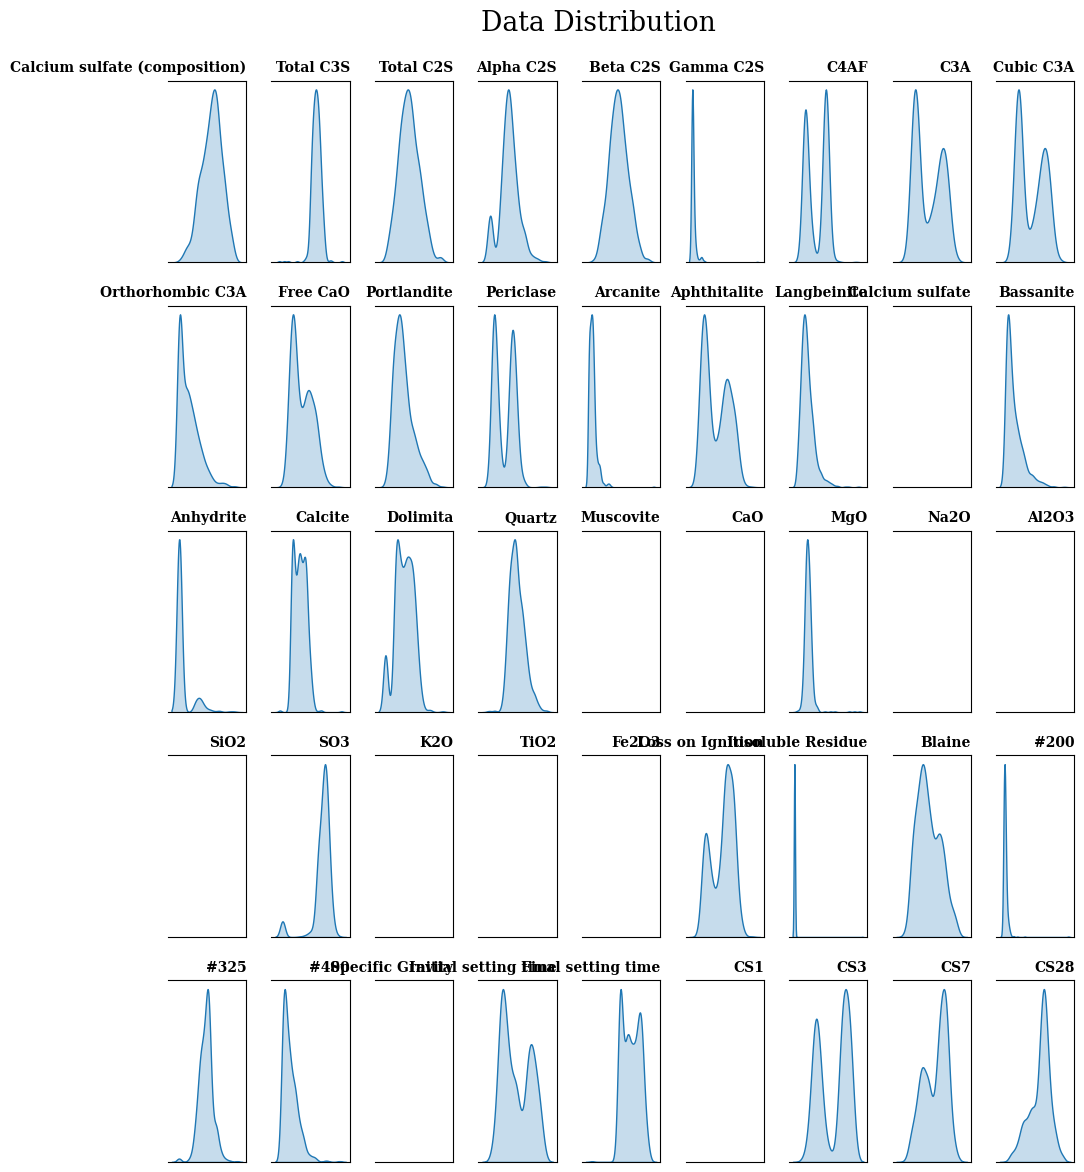

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 9, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = (
    df.select_dtypes(include="float64")
    .select_dtypes(exclude=object)
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

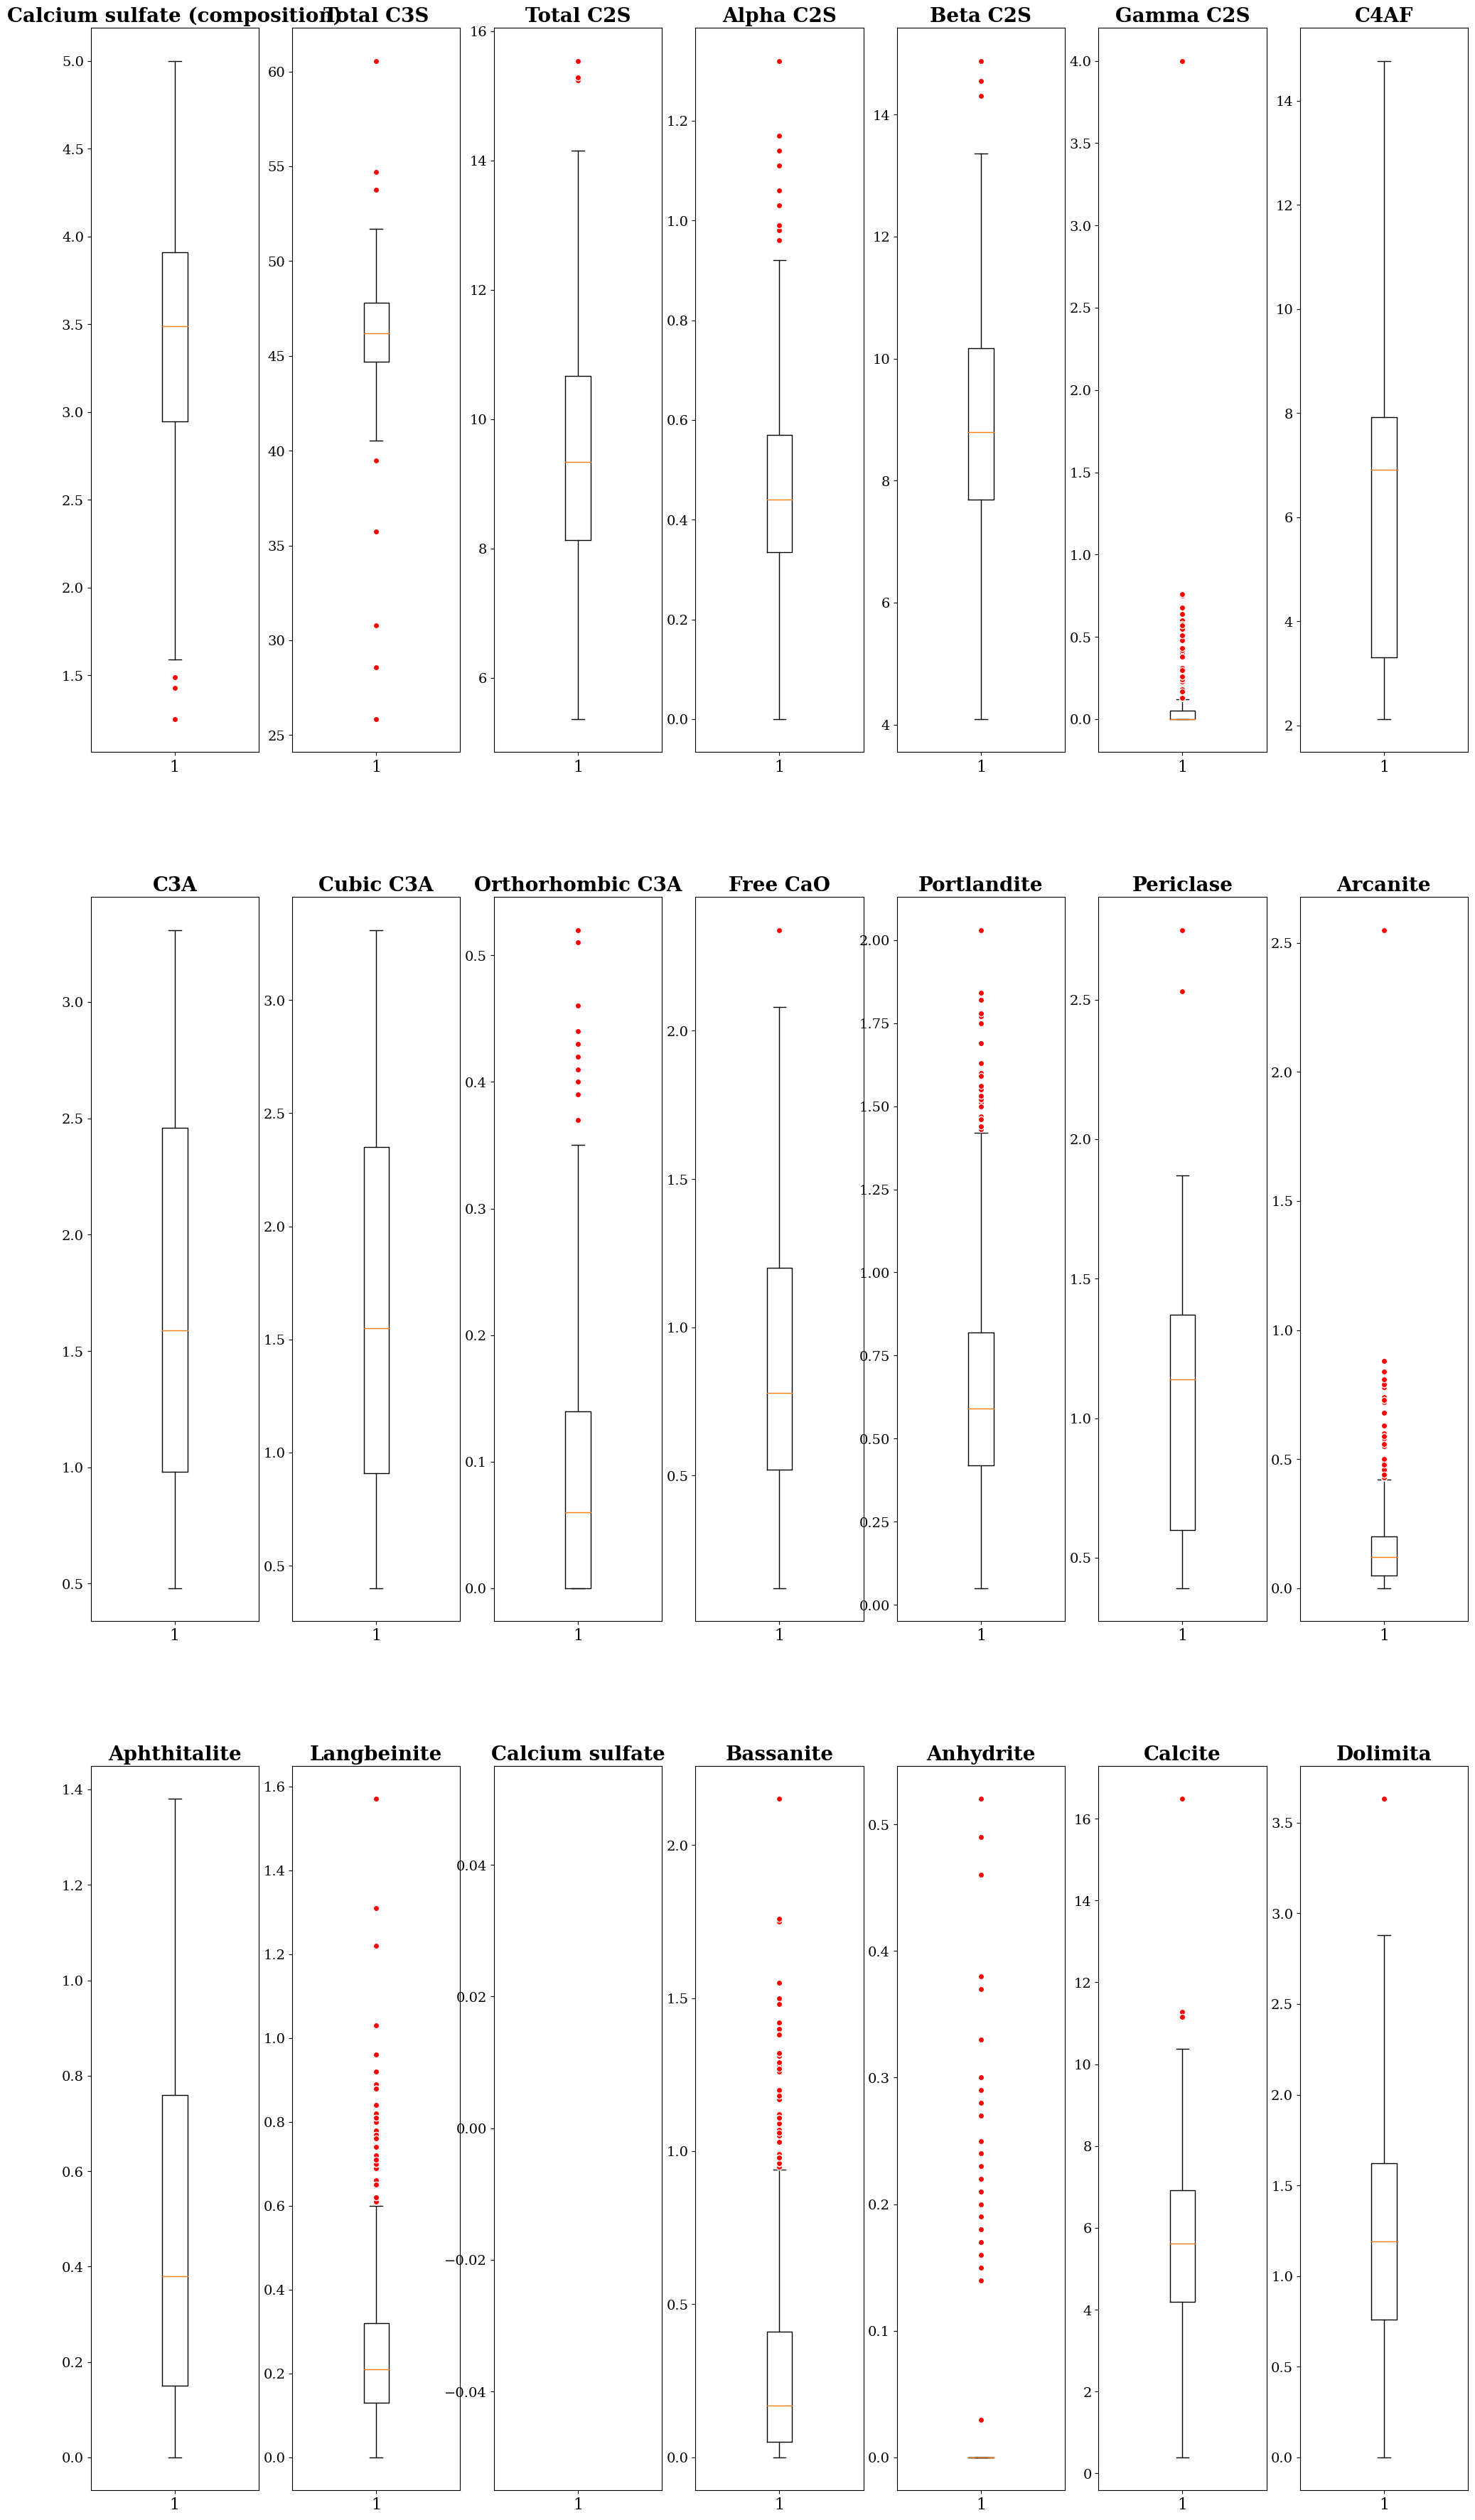

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = (
    df.select_dtypes(include="float64")
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

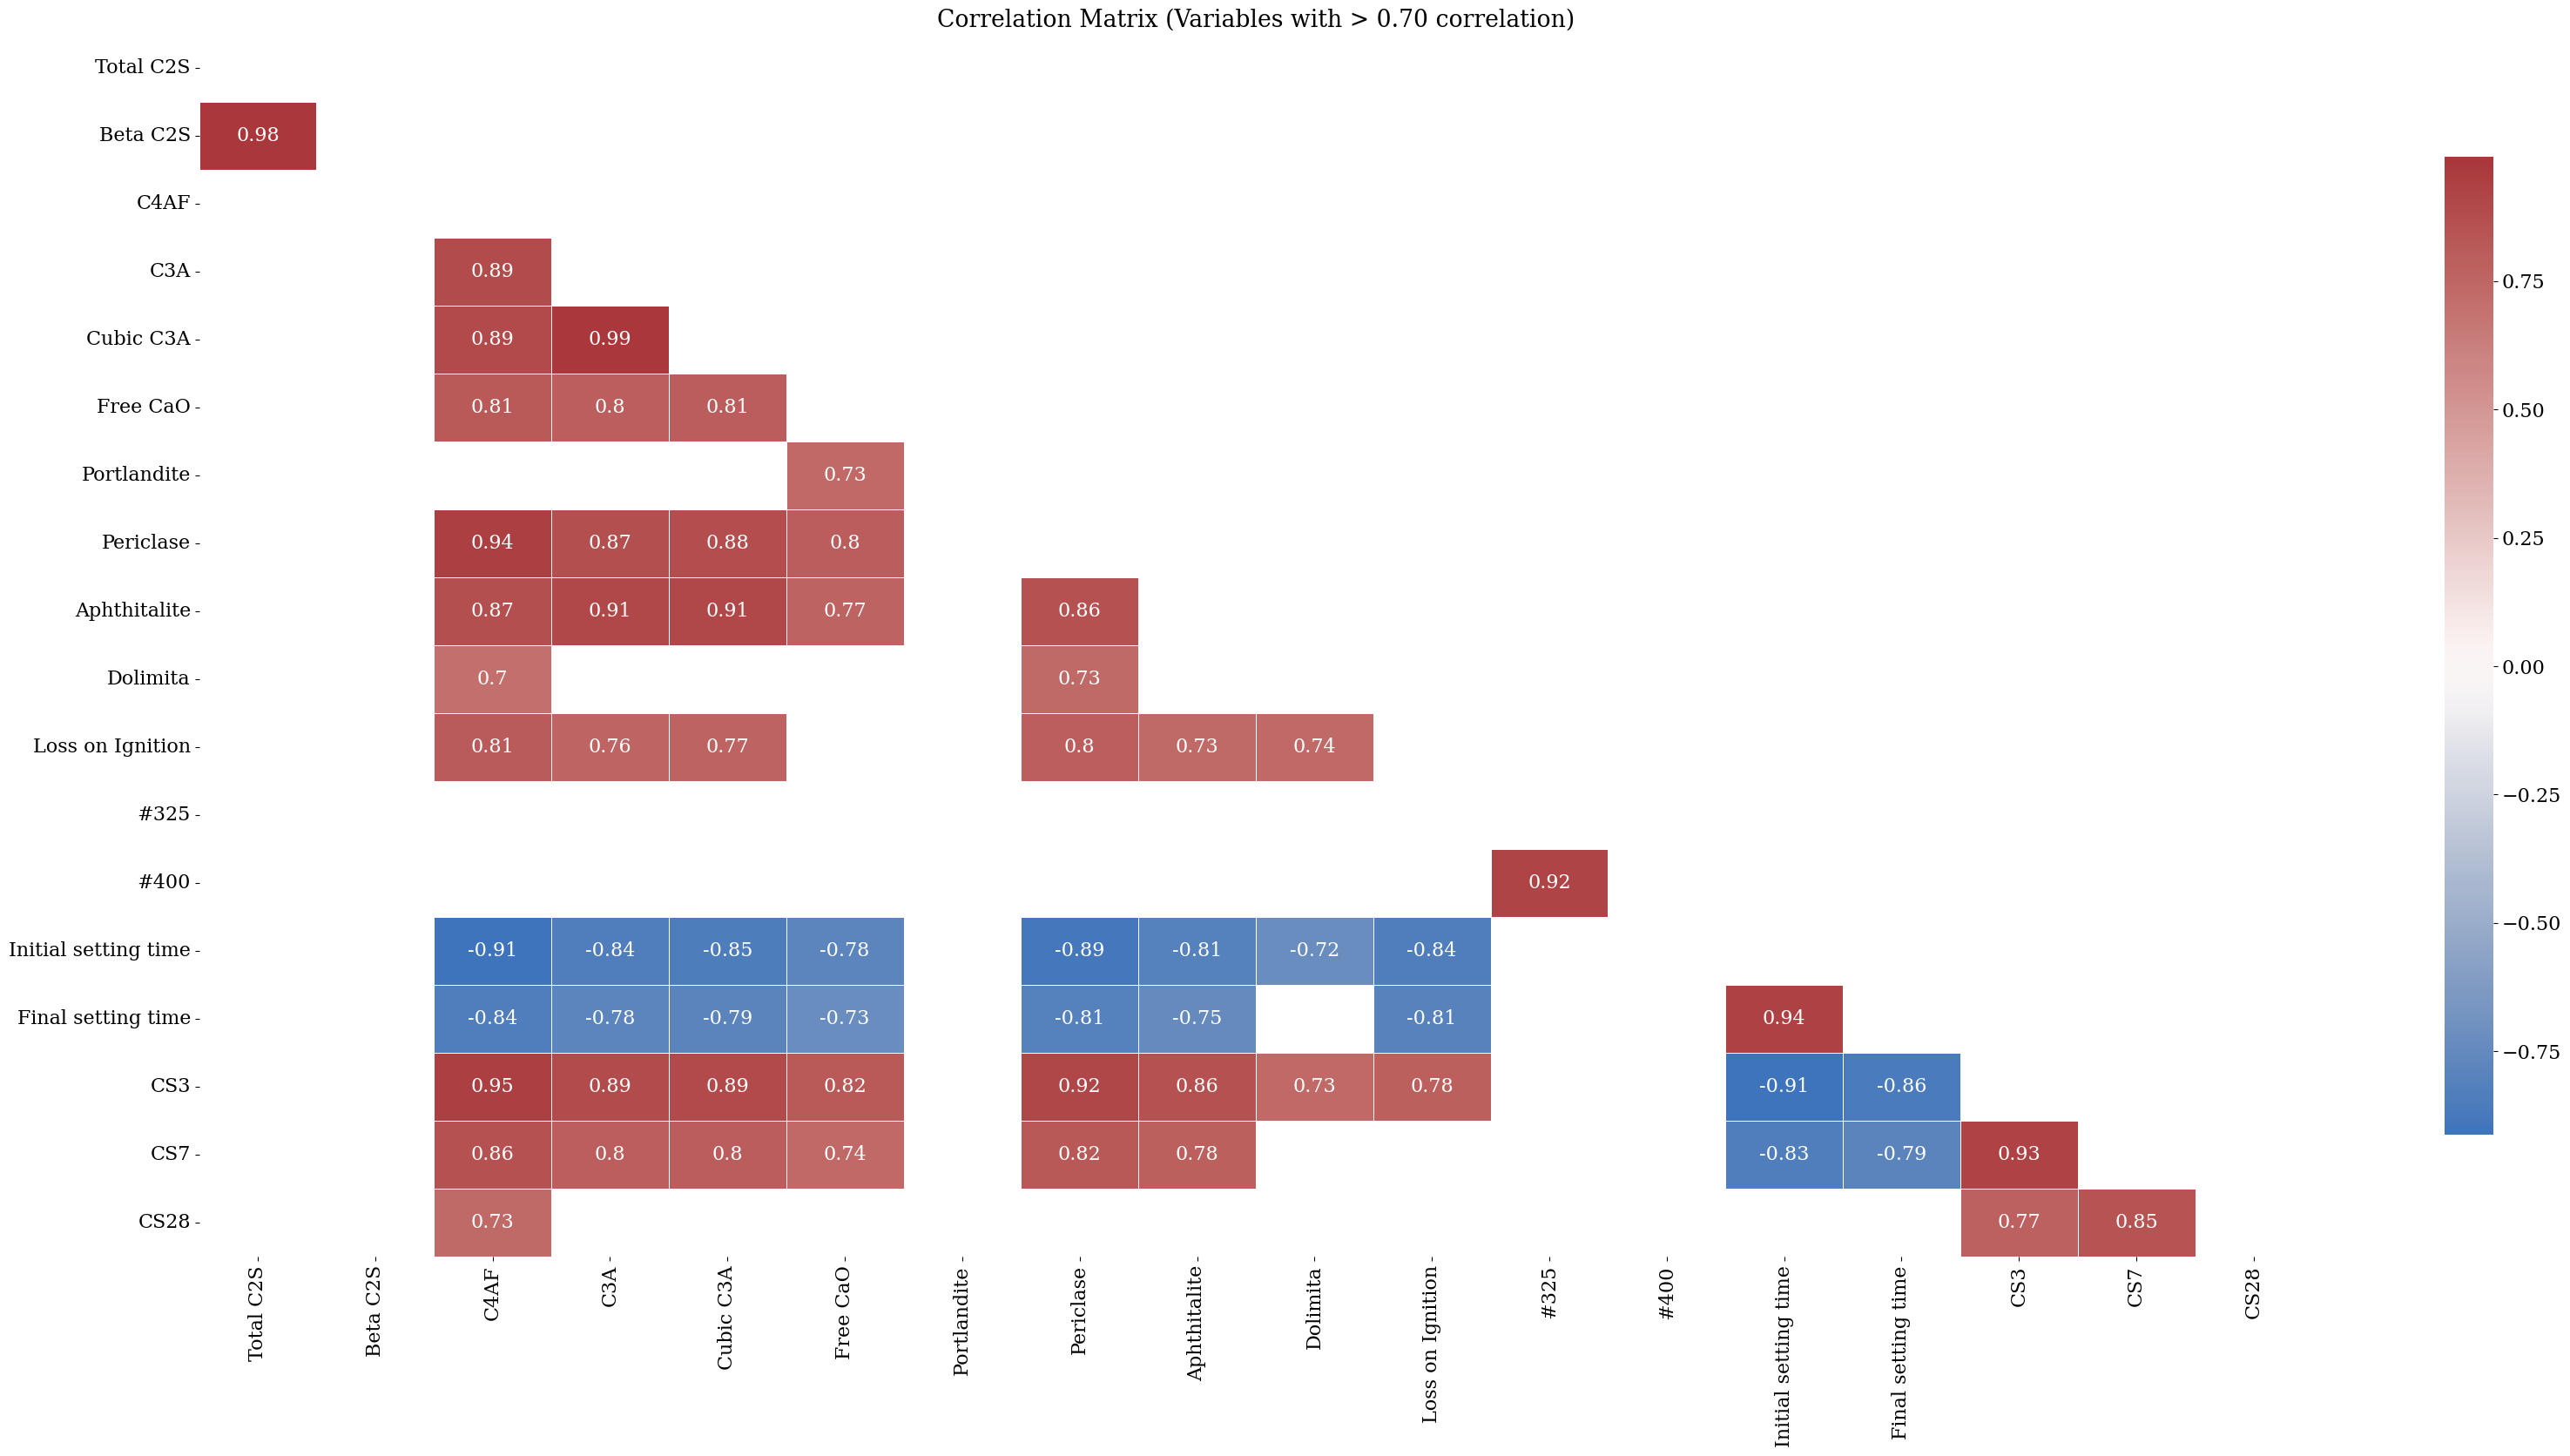

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C3A                   Cubic C3A               0.992679
Total C2S             Beta C2S                0.979473
C4AF                  CS3                     0.946952
                      Periclase               0.940872
Initial setting time  Final setting time      0.940498
                                                ...   
Free CaO              Final setting time      0.726300
Periclase             Dolimita                0.726216
Aphthitalite          Loss on Ignition        0.725695
Dolimita              Initial setting time    0.721208
C4AF                  Dolimita                0.704255
Length: 64, dtype: float64

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.845276
CS3                            CS28    0.774895
C4AF                           CS28    0.727411
Initial setting time           CS28    0.686829
Periclase                      CS28    0.685250
Cubic C3A                      CS28    0.661267
C3A                            CS28    0.659701
Aphthitalite                   CS28    0.646707
Final setting time             CS28    0.644732
Free CaO                       CS28    0.601928
Loss on Ignition               CS28    0.510145
Dolimita                       CS28    0.486891
Blaine                         CS28    0.435038
Portlandite                    CS28    0.319719
#400                           CS28    0.296189
Quartz                         CS28    0.237750
Langbeinite                    CS28    0.210966
SO3                            CS28    0.177353
Calcite                        CS28    0.124190
Orthorhombic C3A               CS28    0.104797
Bassanite                      CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

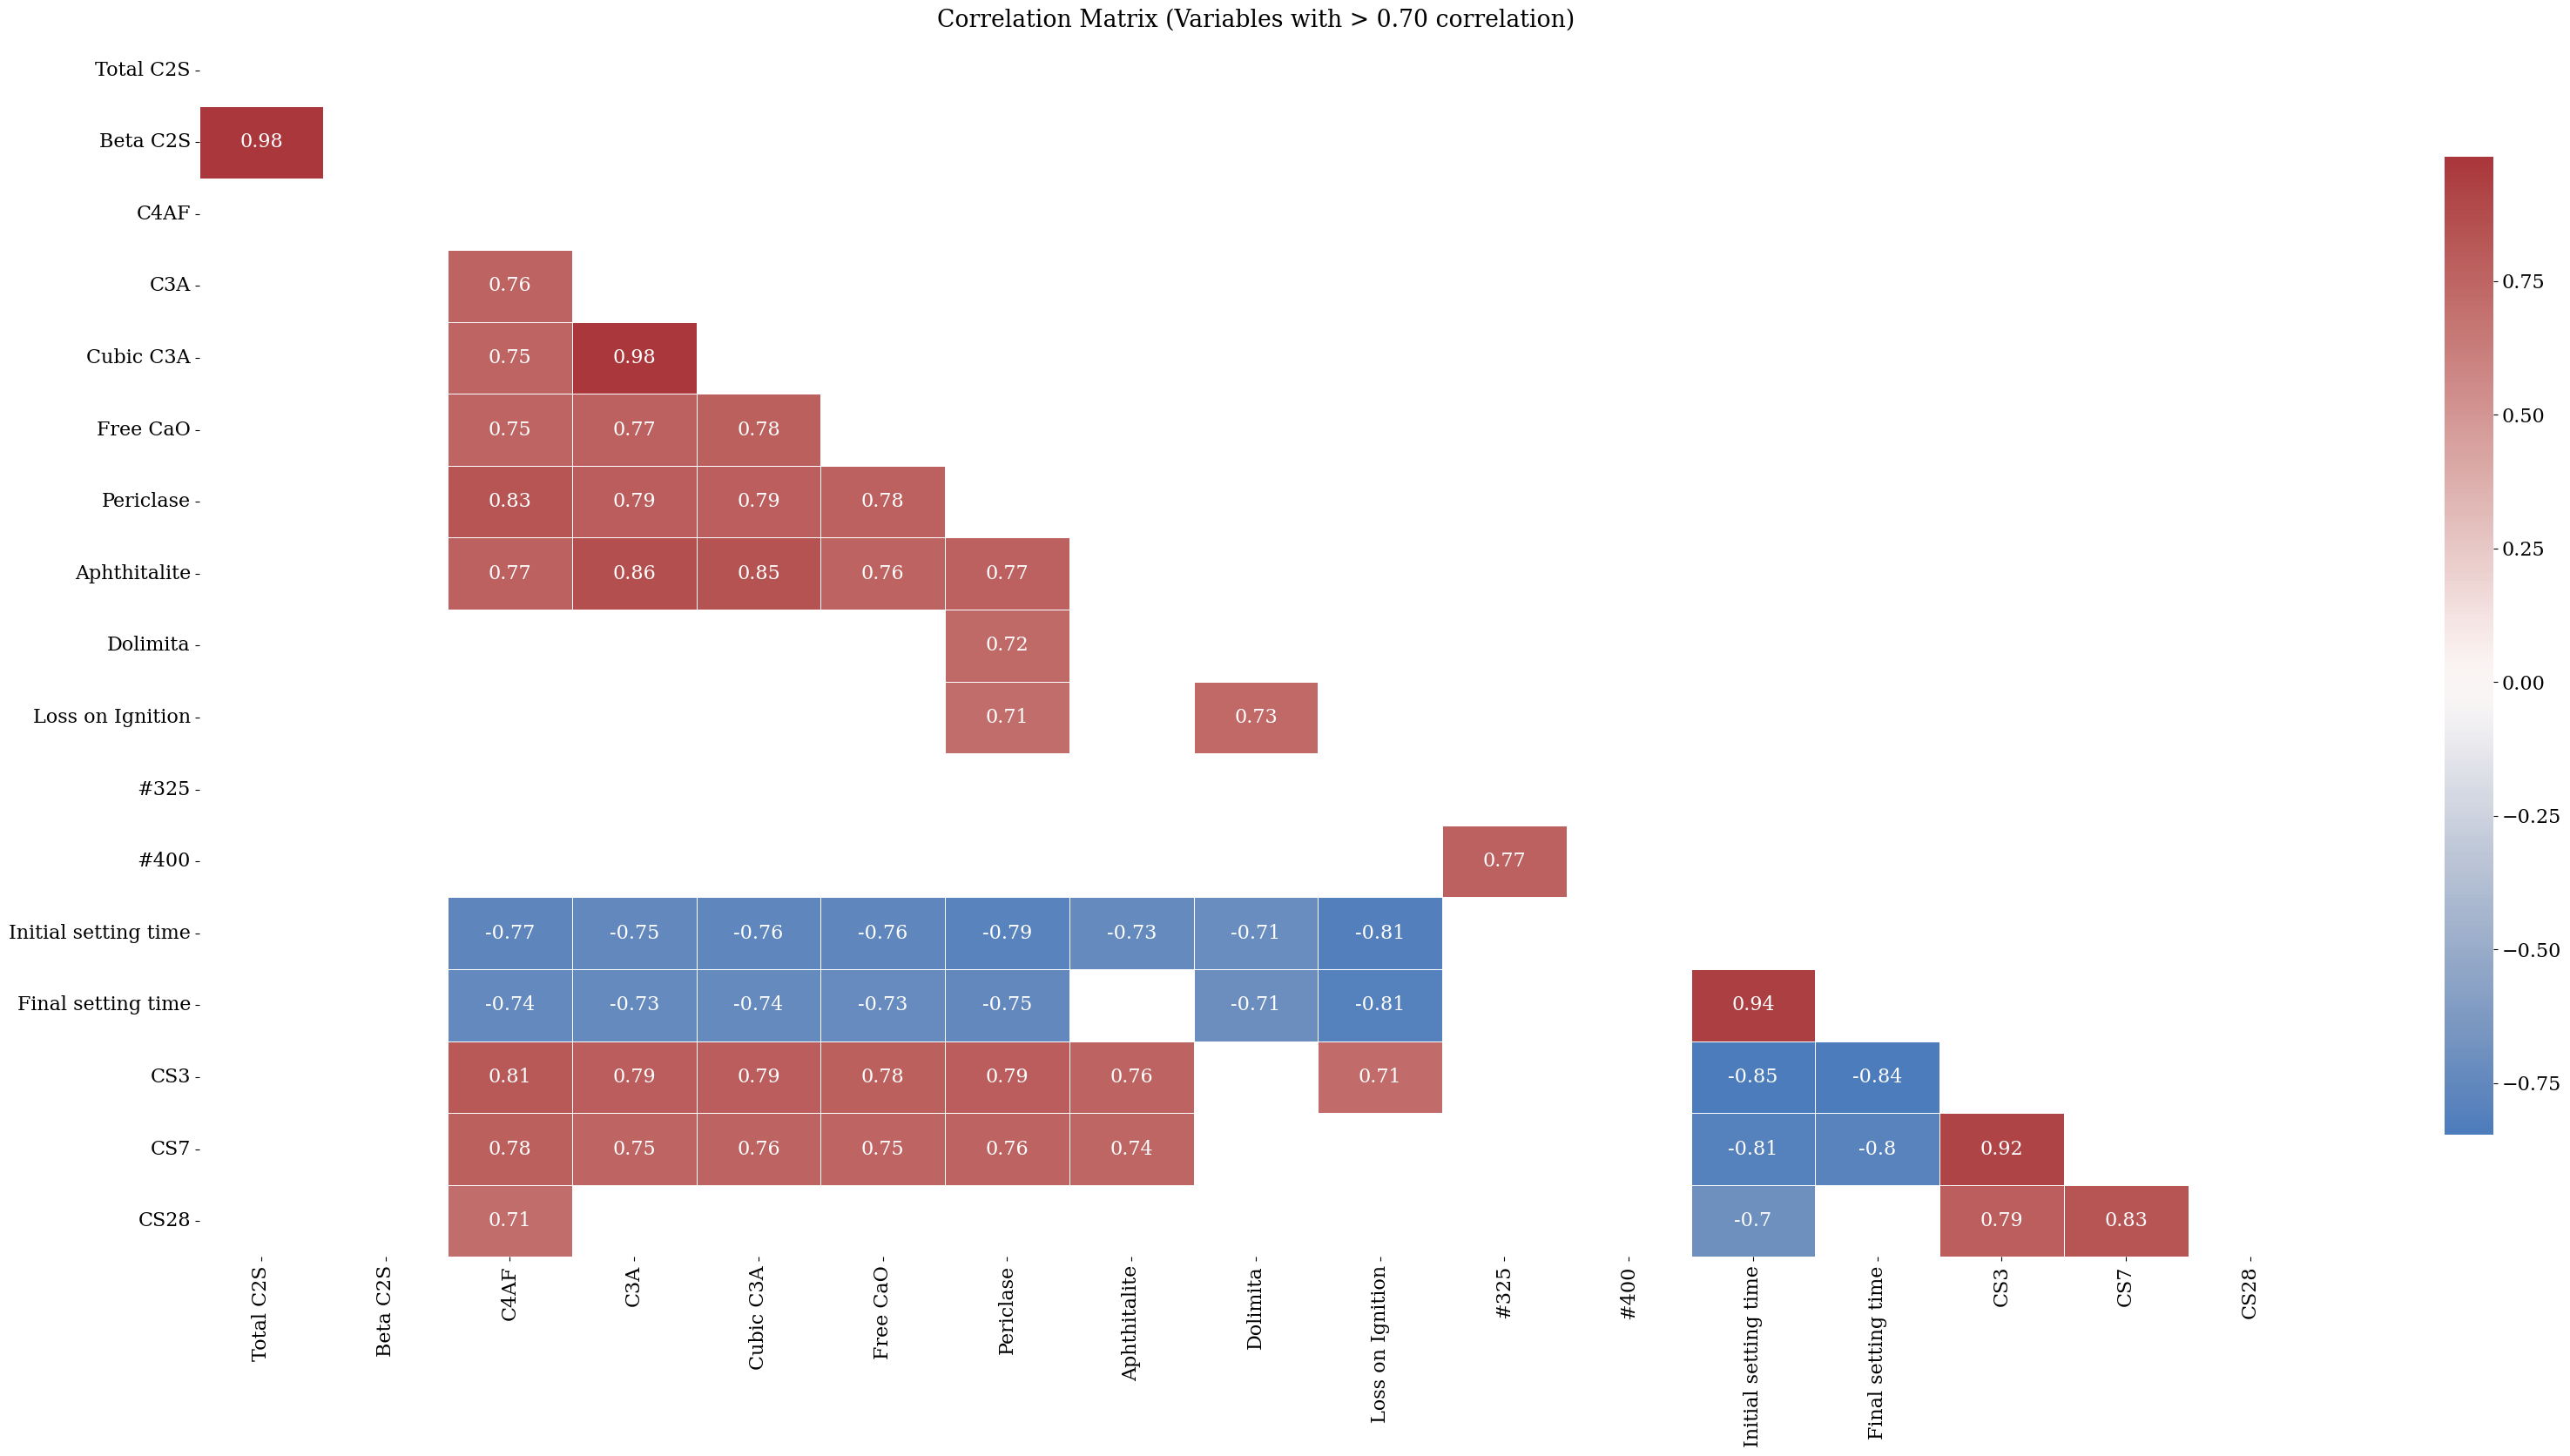

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Total C2S             Beta C2S                0.983191
C3A                   Cubic C3A               0.980086
Initial setting time  Final setting time      0.937733
CS3                   CS7                     0.918825
C3A                   Aphthitalite            0.855063
Initial setting time  CS3                     0.846688
Cubic C3A             Aphthitalite            0.845915
Final setting time    CS3                     0.840118
C4AF                  Periclase               0.826820
CS7                   CS28                    0.825979
Loss on Ignition      Initial setting time    0.813543
C4AF                  CS3                     0.813101
Loss on Ignition      Final setting time      0.809007
Initial setting time  CS7                     0.805112
Final setting time    CS7                     0.795536
C3A                   Periclase               0.792183
                      CS3                     0.791999
Periclase             Initial setting time    0.790987
Cubic C3A 

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.825979
CS3                            CS28    0.785324
C4AF                           CS28    0.710022
Initial setting time           CS28    0.700902
Cubic C3A                      CS28    0.683645
C3A                            CS28    0.681657
Final setting time             CS28    0.680090
Periclase                      CS28    0.676645
Aphthitalite                   CS28    0.667437
Free CaO                       CS28    0.664826
Loss on Ignition               CS28    0.594261
Dolimita                       CS28    0.580941
Blaine                         CS28    0.521949
Insoluble Residue              CS28    0.467715
SO3                            CS28    0.461515
#400                           CS28    0.438098
Portlandite                    CS28    0.330249
Quartz                         CS28    0.283666
Calcite                        CS28    0.256442
Langbeinite                    CS28    0.205549
#200                           CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

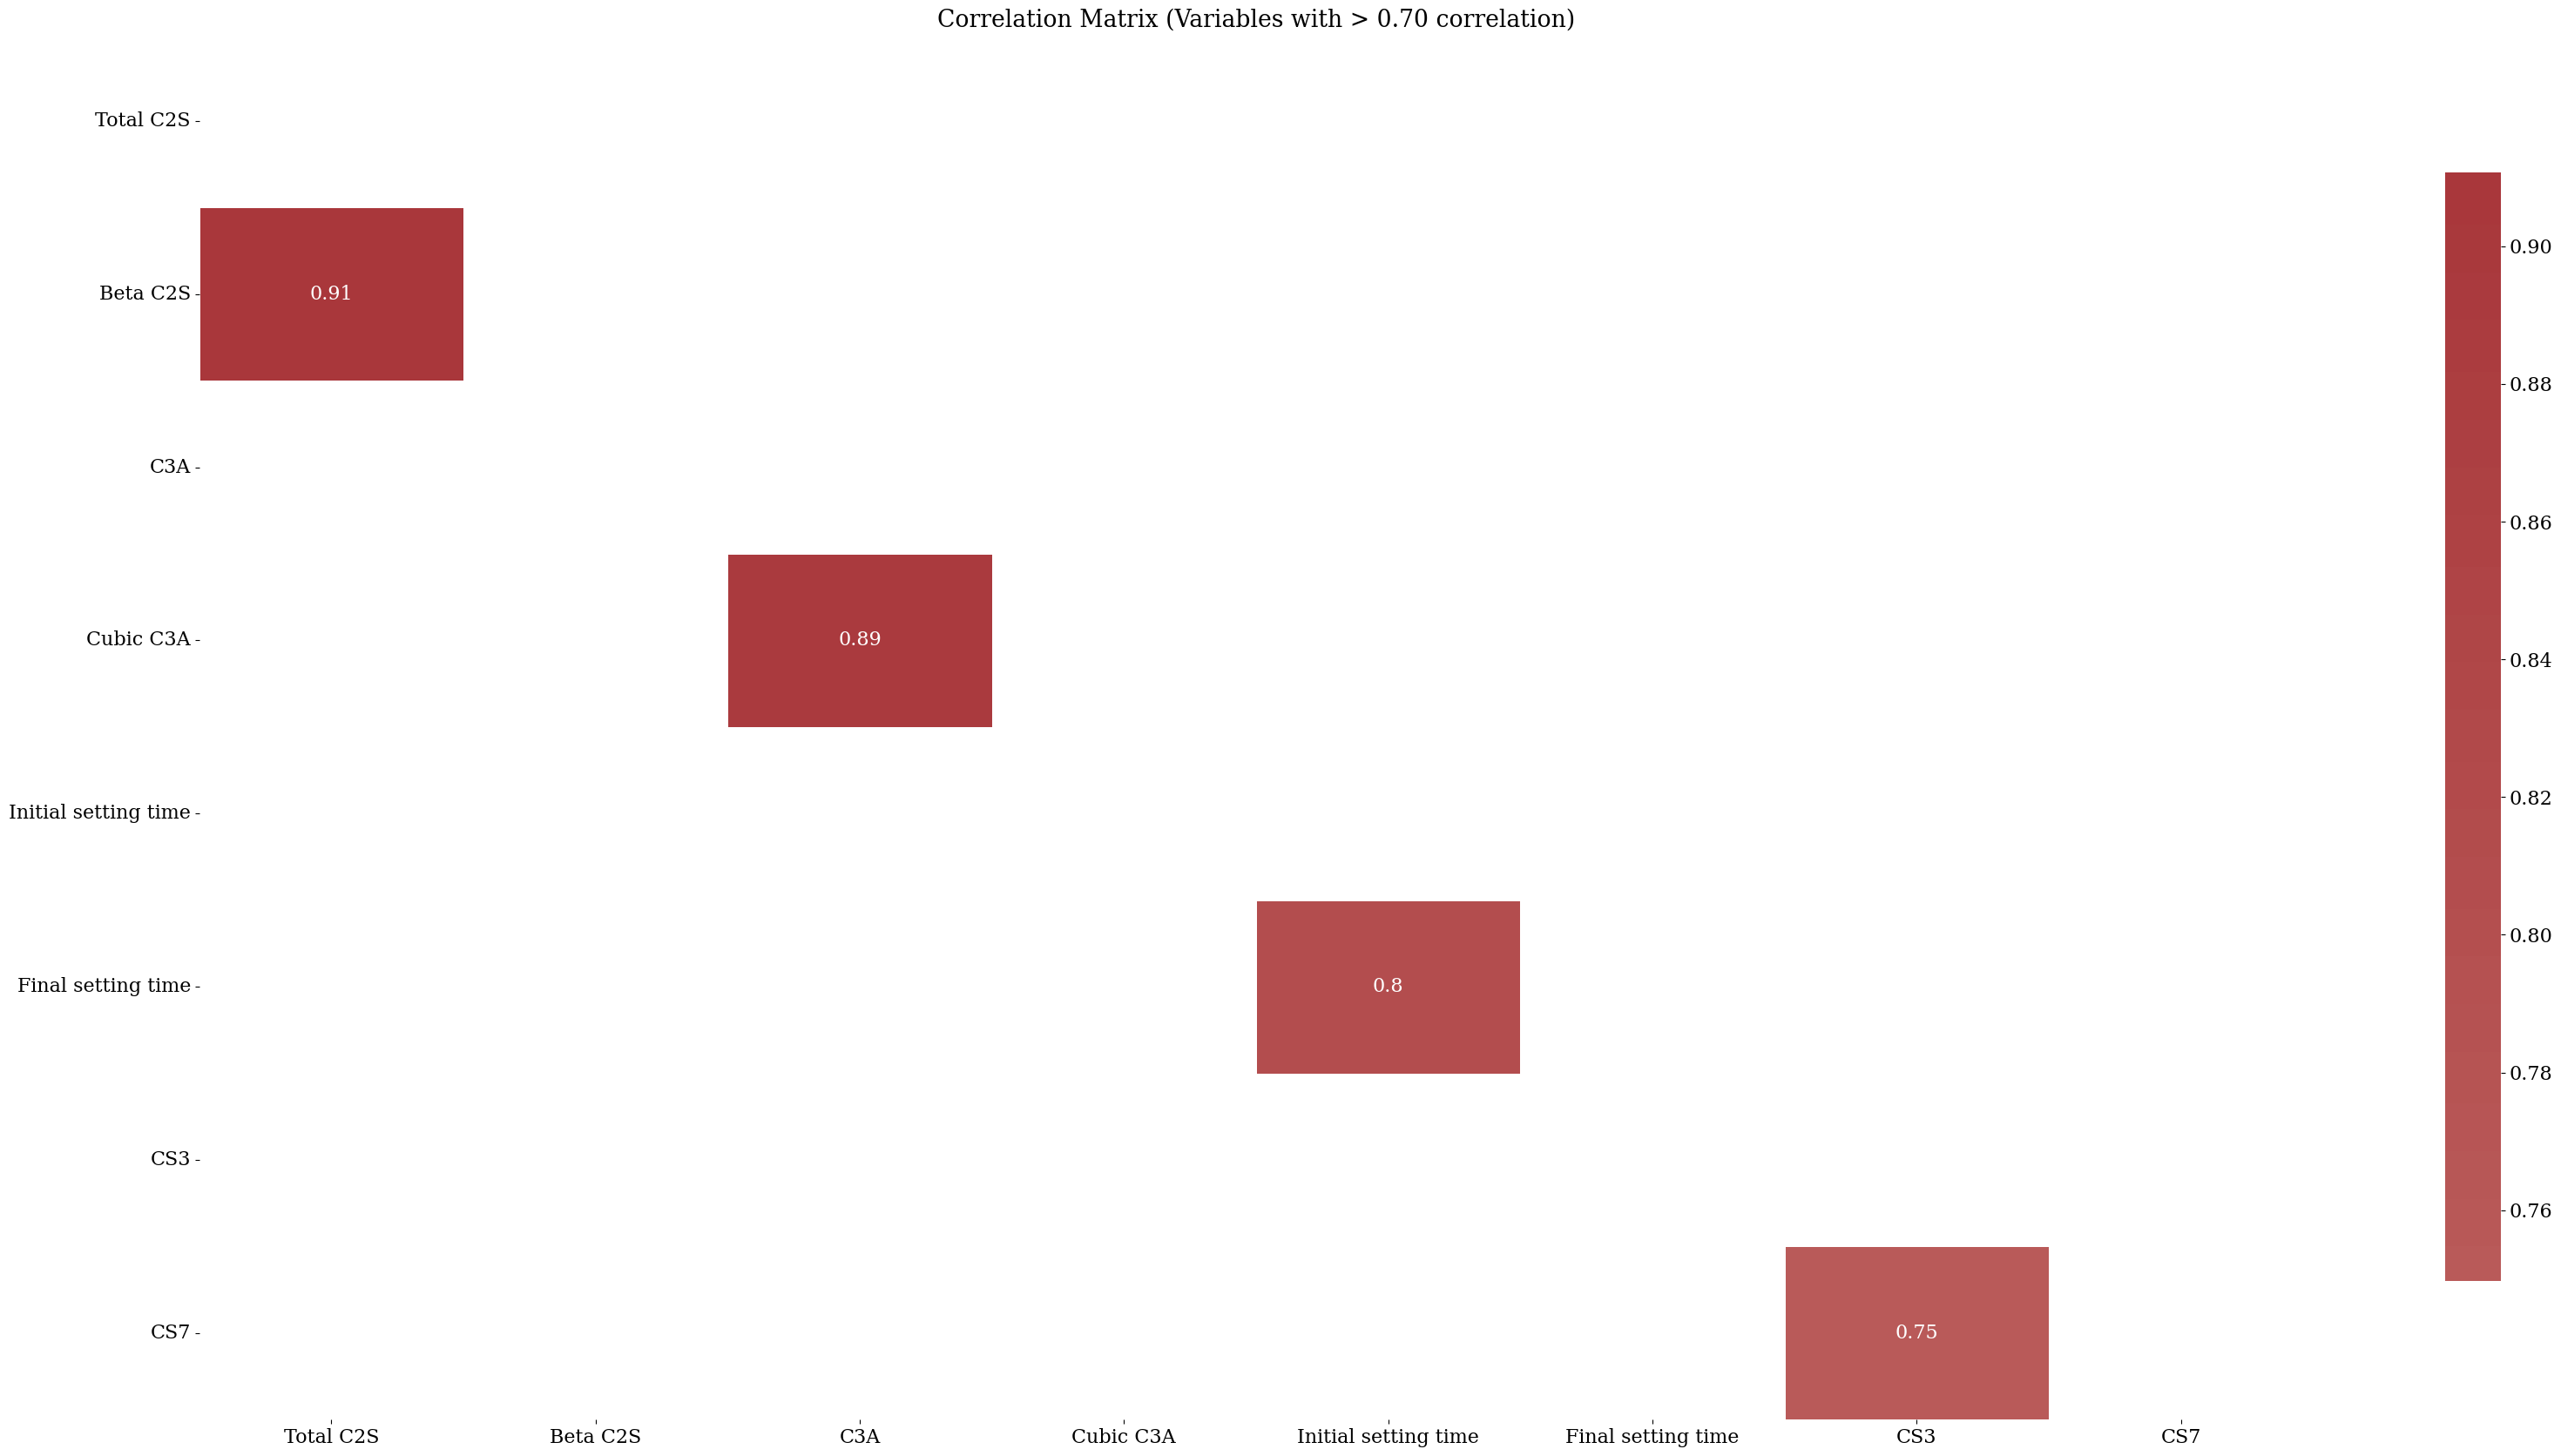

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Total C2S             Beta C2S              0.910670
C3A                   Cubic C3A             0.893498
Initial setting time  Final setting time    0.804573
CS3                   CS7                   0.749702
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.634974
CS3                            CS28    0.581328
C4AF                           CS28    0.495924
Initial setting time           CS28    0.488224
C3A                            CS28    0.473366
Cubic C3A                      CS28    0.471994
Final setting time             CS28    0.467931
Periclase                      CS28    0.461489
Aphthitalite                   CS28    0.460155
Free CaO                       CS28    0.450311
Loss on Ignition               CS28    0.377475
Dolimita                       CS28    0.367203
Blaine                         CS28    0.334160
#400                           CS28    0.322251
SO3                            CS28    0.319780
Insoluble Residue              CS28    0.303973
Portlandite                    CS28    0.219199
Calcite                        CS28    0.186920
Quartz                         CS28    0.184910
Langbeinite                    CS28    0.136612
#200                           CS28    0

<IPython.core.display.Javascript object>

#### Bivariate Analysis

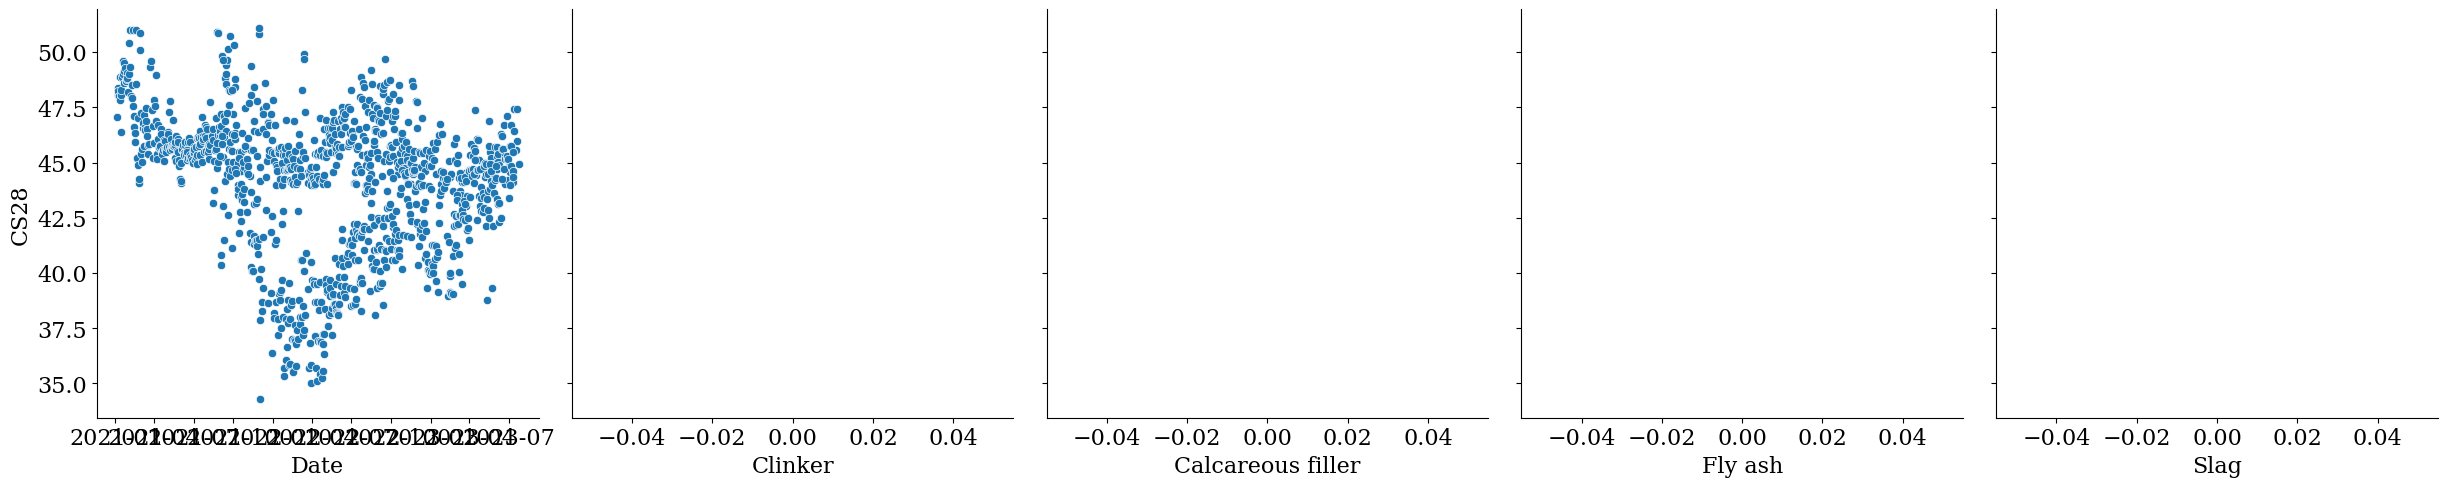

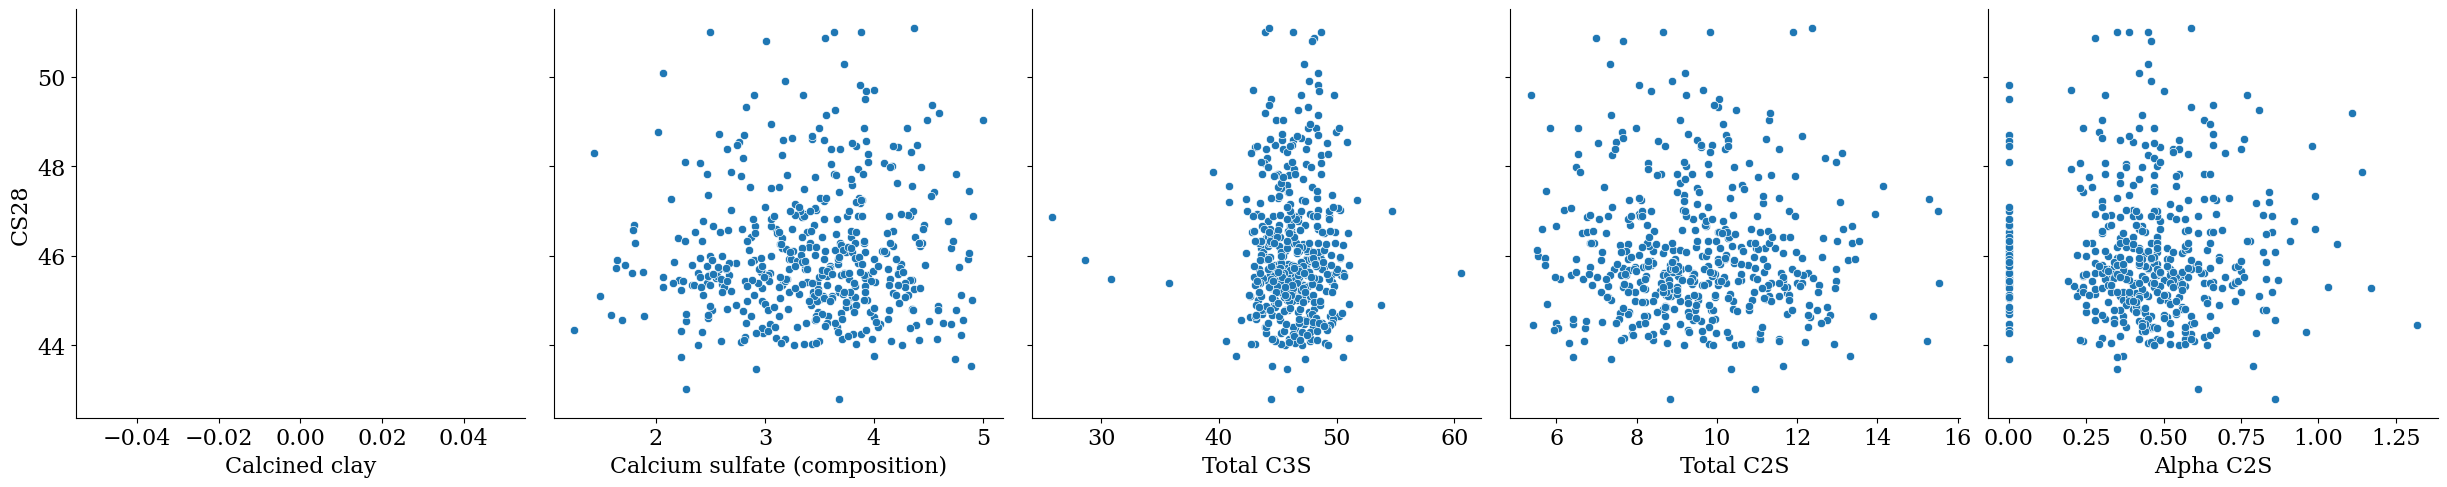

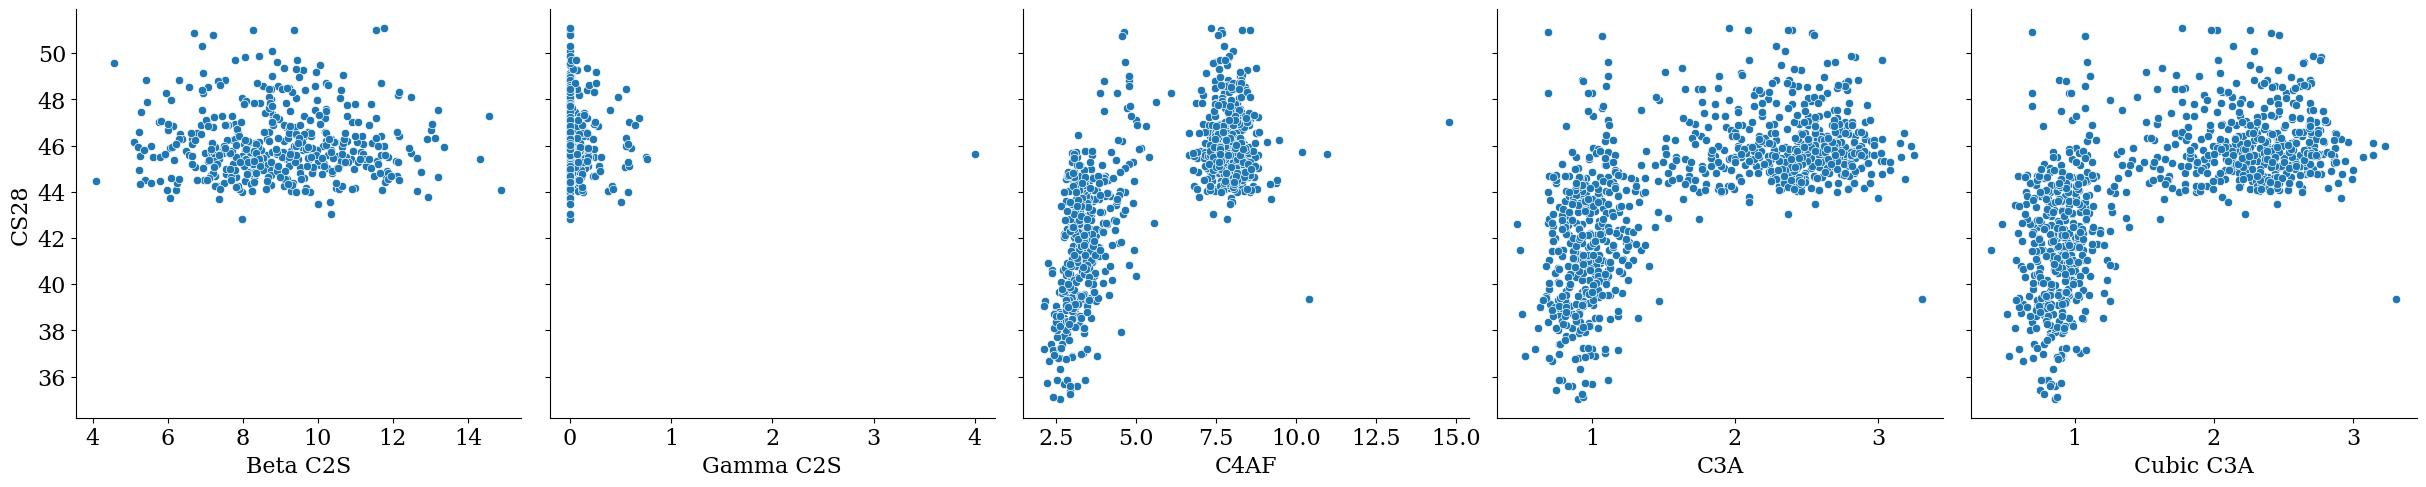

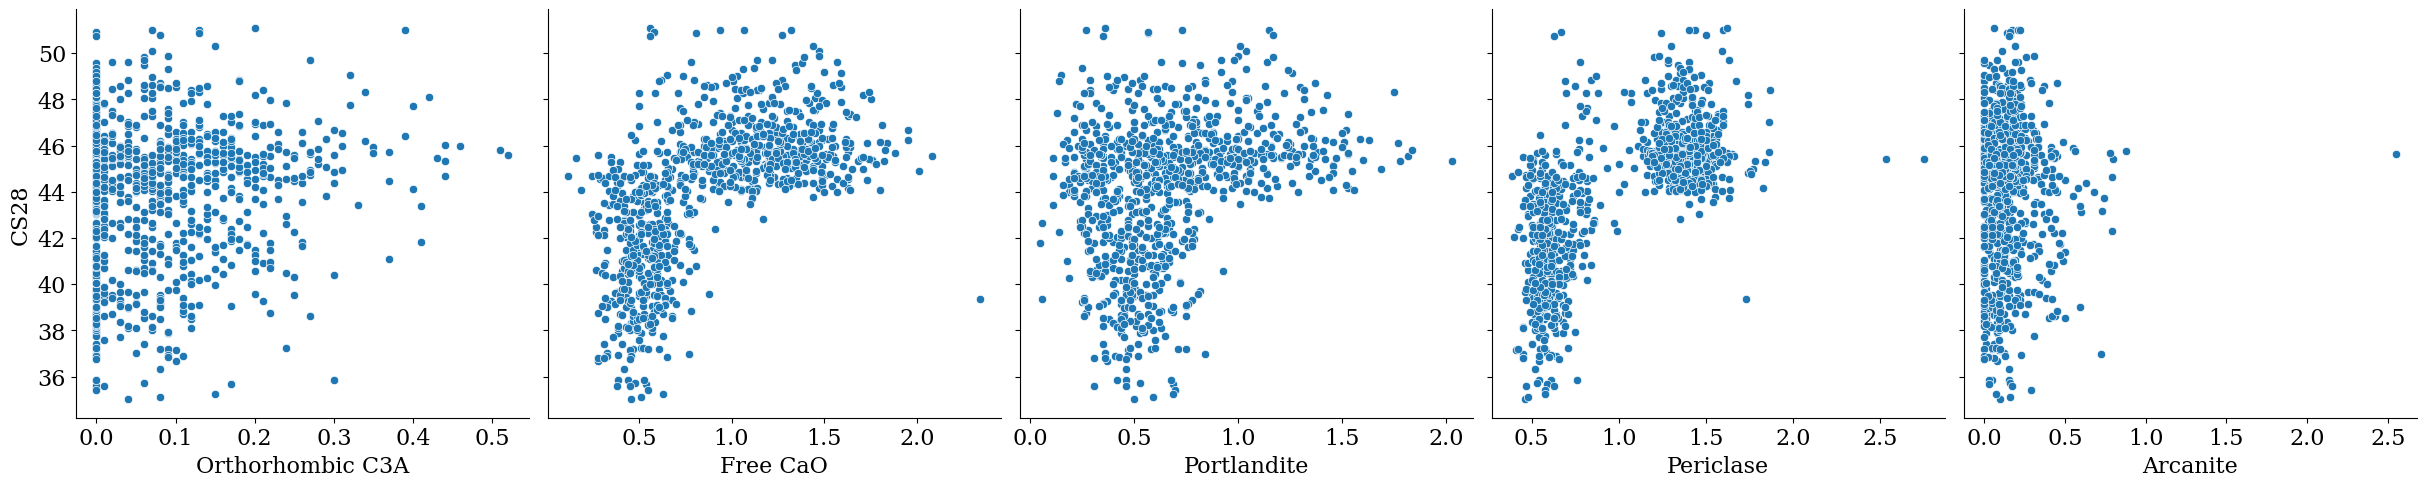

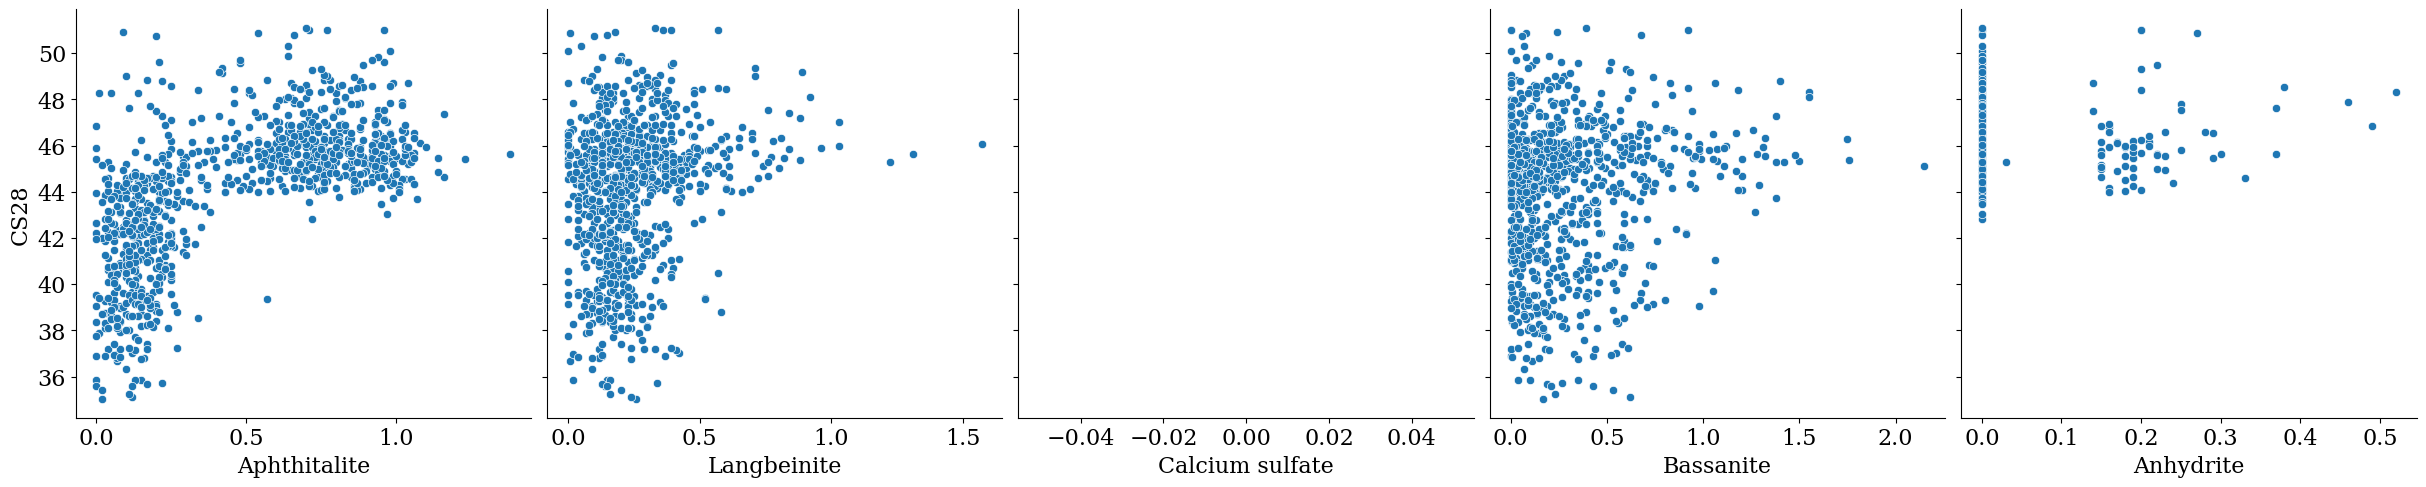

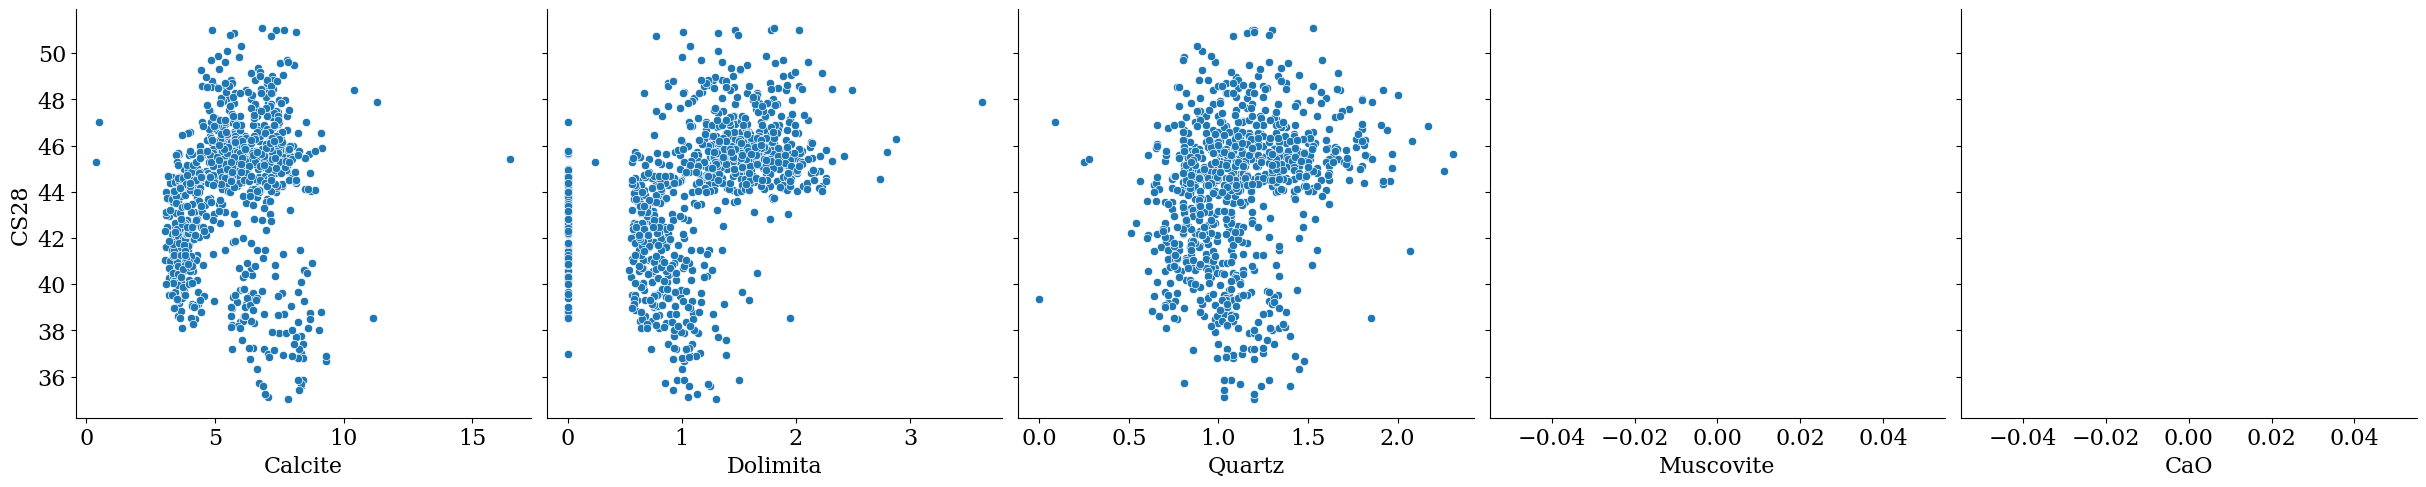

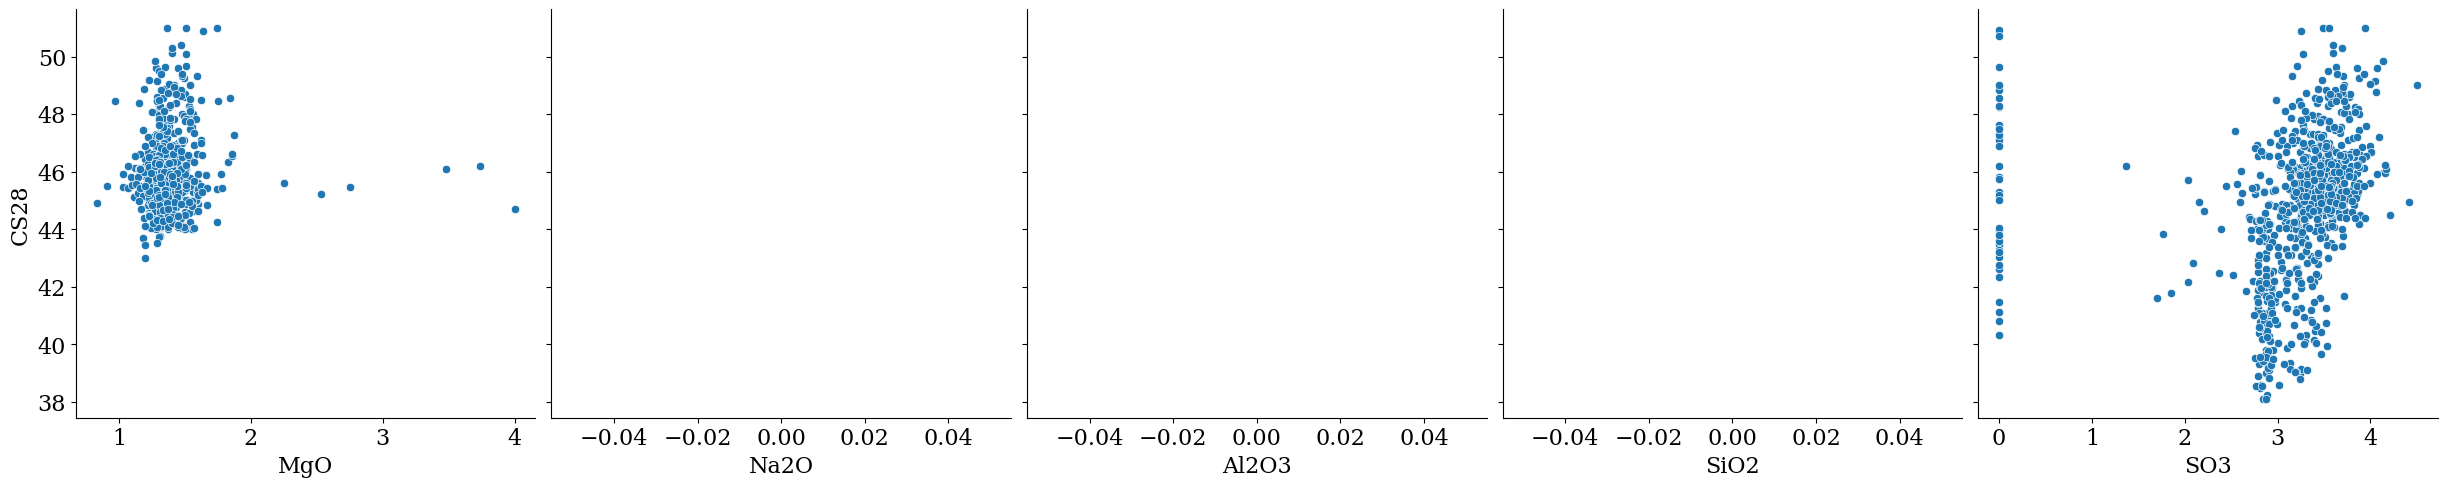

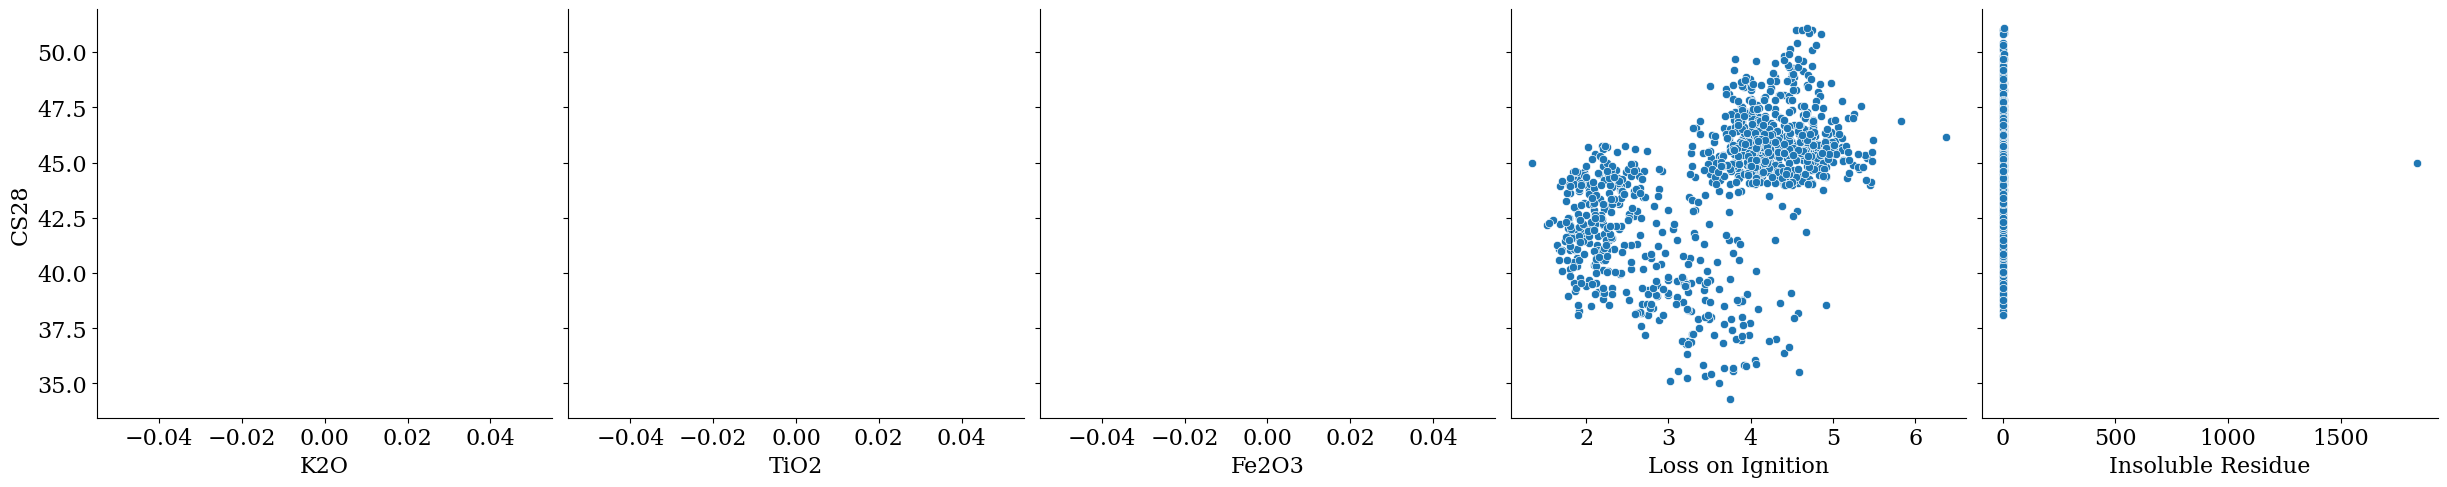

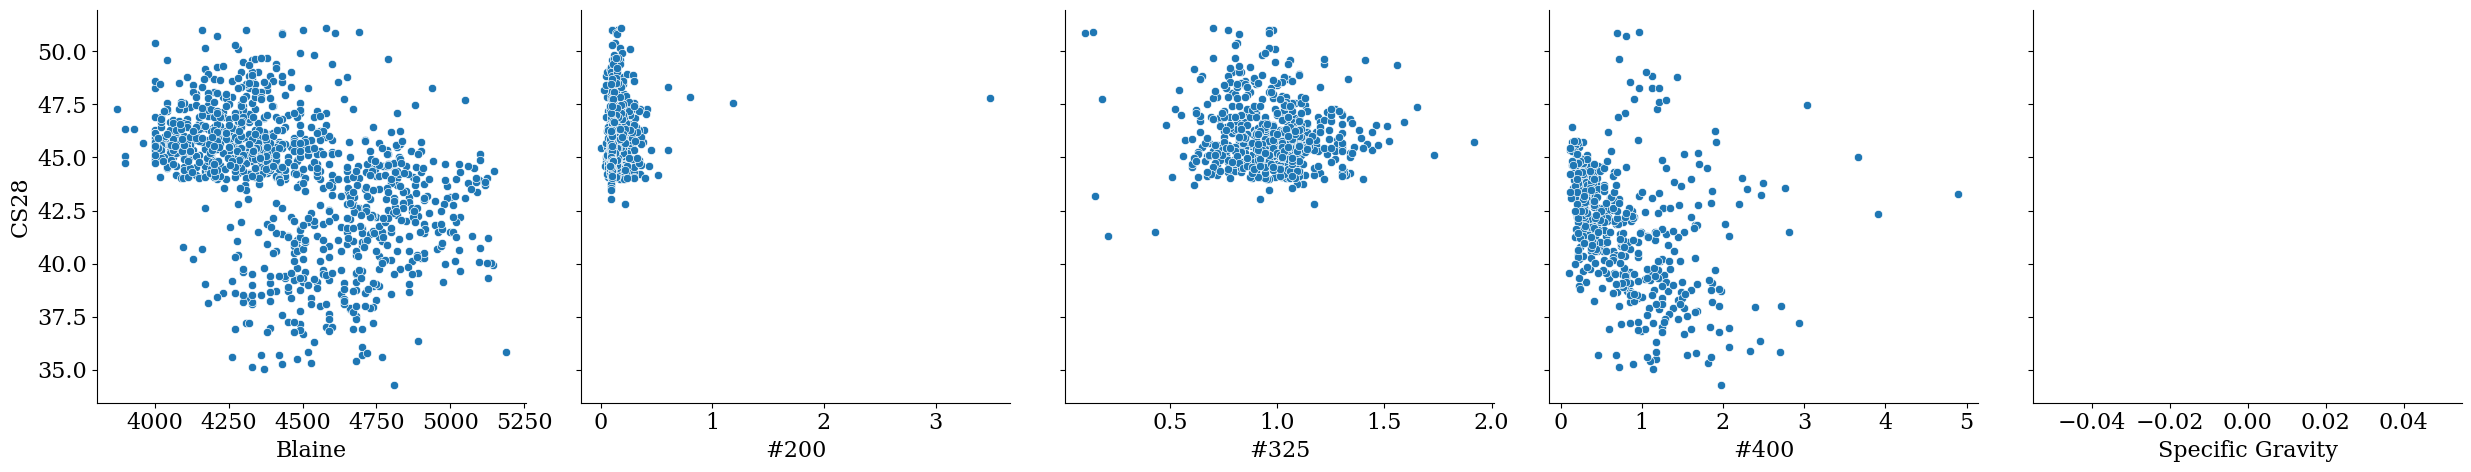

<IPython.core.display.Javascript object>

In [71]:
num_lines = 9
plots_per_line = 5

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

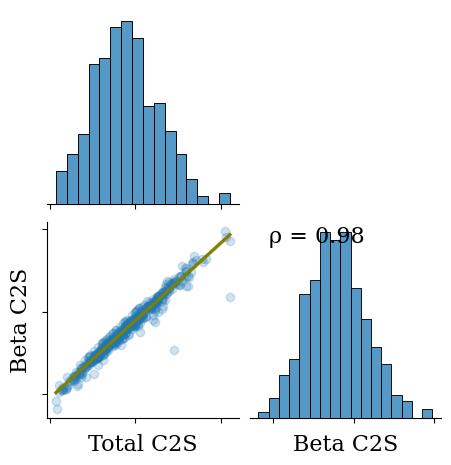

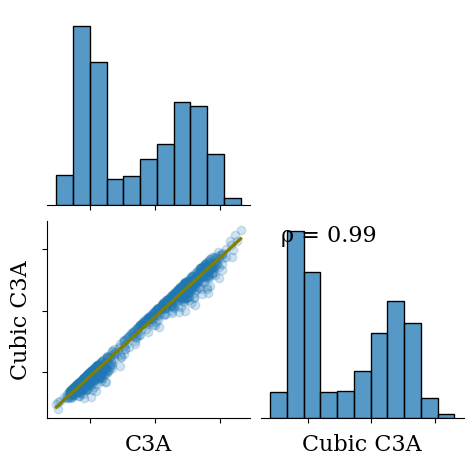

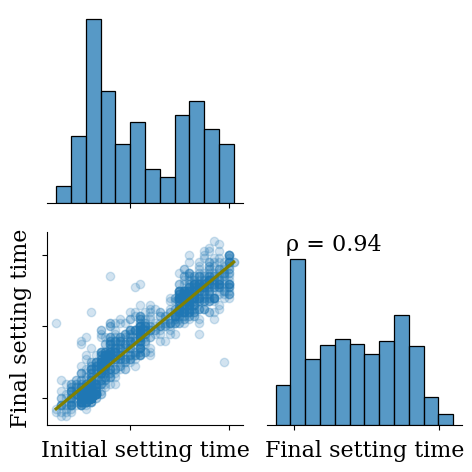

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

642 valid days out of 764


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        24
      2        22
      3        23
      4        24
      5        25
      6        25
      7        27
      8        23
      9        28
      10       24
      11       23
      12       24
2022  1        25
      2        24
      3        22
      4        25
      5        27
      6        23
      7        28
      8        28
      9        27
      10       25
      11       23
      12       25
2023  1        22
      2        19
      3        26
      4        21
      5        25
      6        22
      7        23
      8        12
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

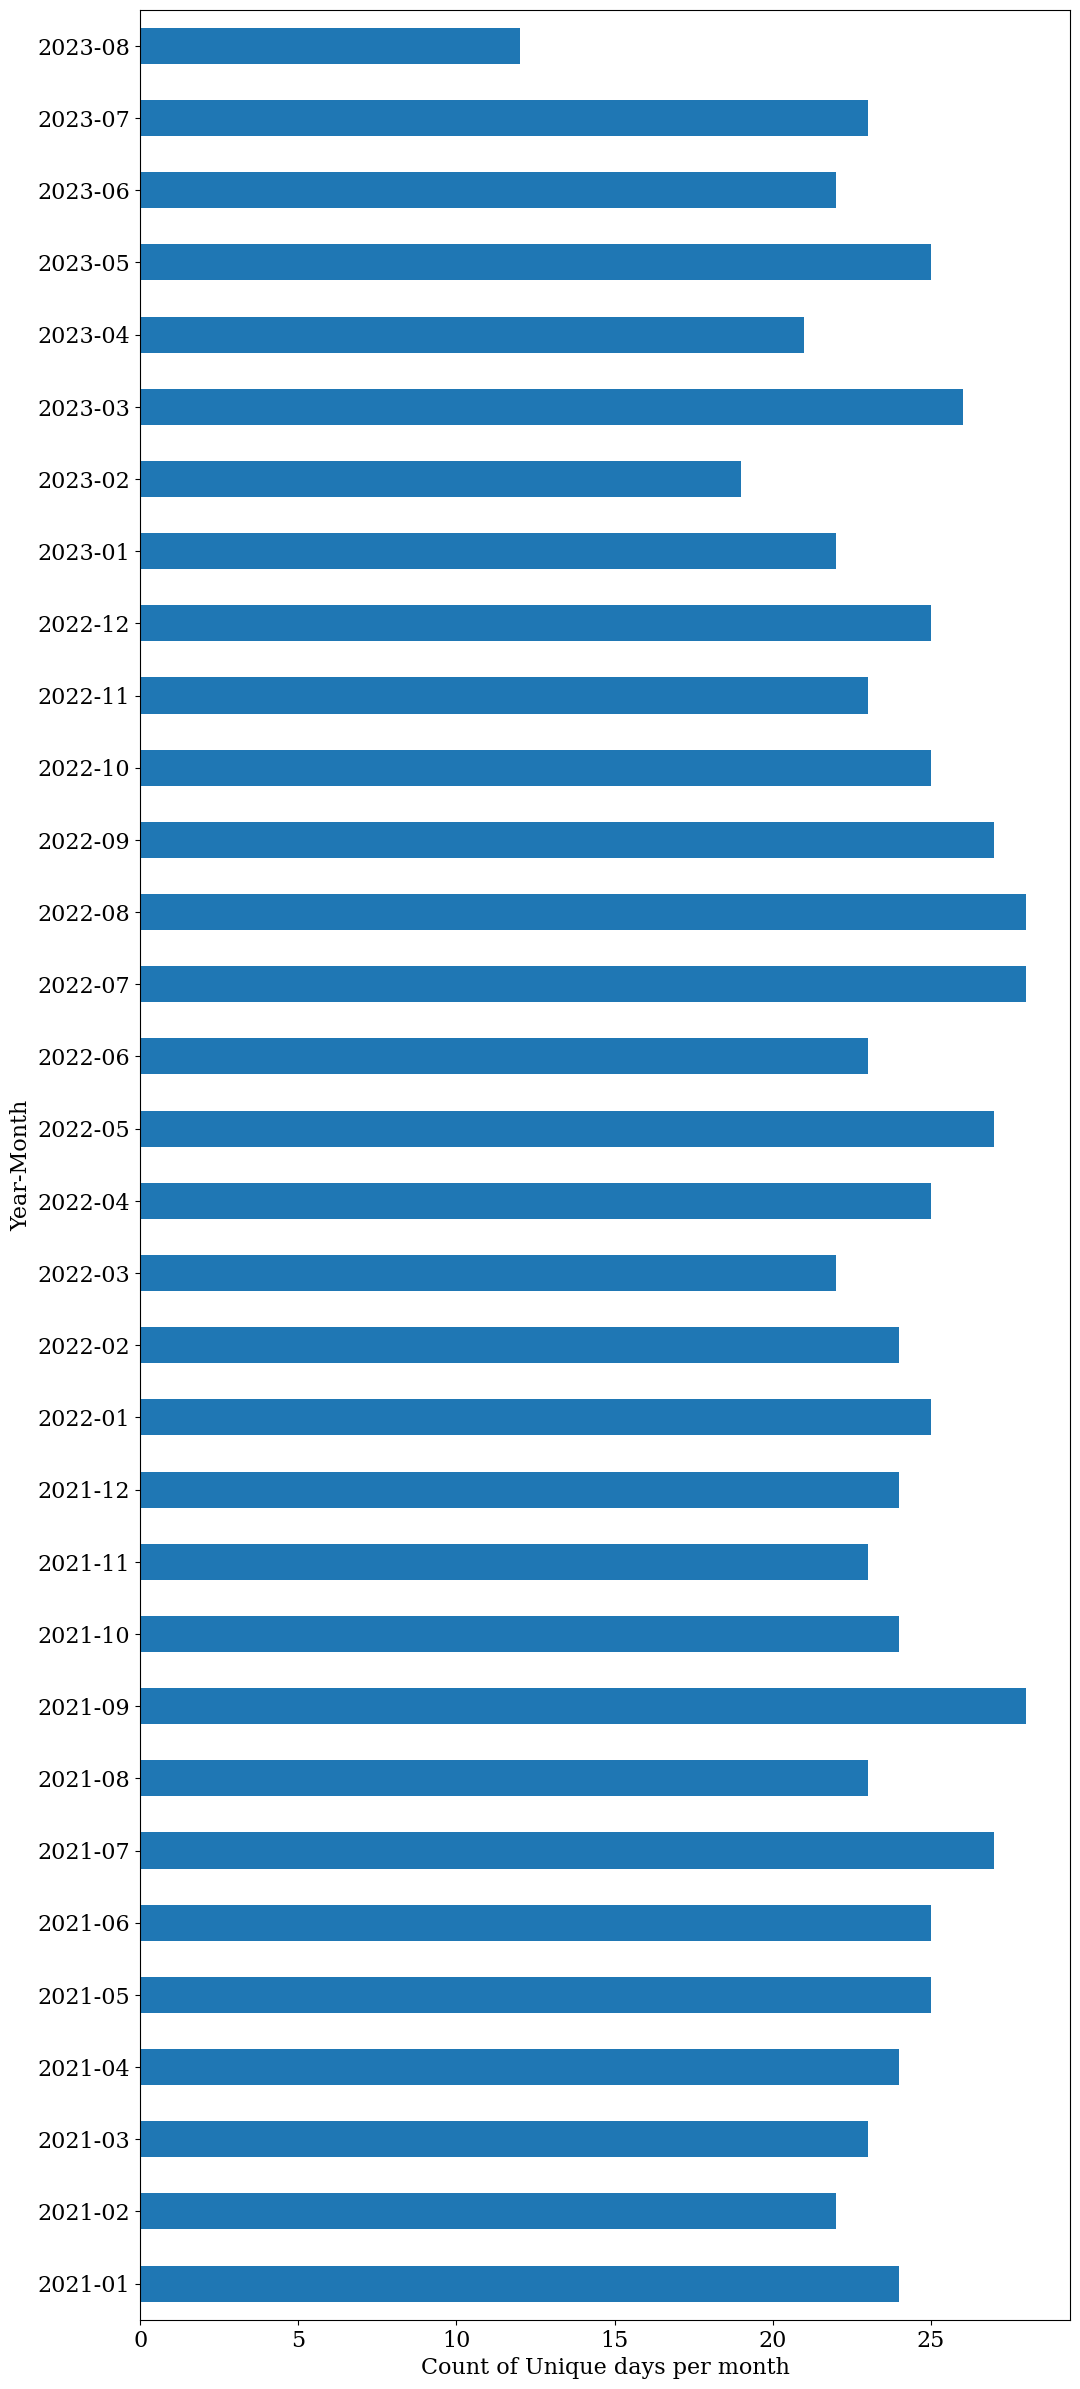

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        24
      2        22
      3        23
      4        24
      5        25
      6        25
      7        27
      8        27
      9        46
      10       39
      11       39
      12       33
2022  1        42
      2        44
      3        39
      4        45
      5        50
      6        44
      7        51
      8        53
      9        50
      10       49
      11       41
      12       36
2023  1        32
      2        29
      3        39
      4        27
      5        37
      6        33
      7        33
      8        14
Name: size, dtype: int64


<IPython.core.display.Javascript object>

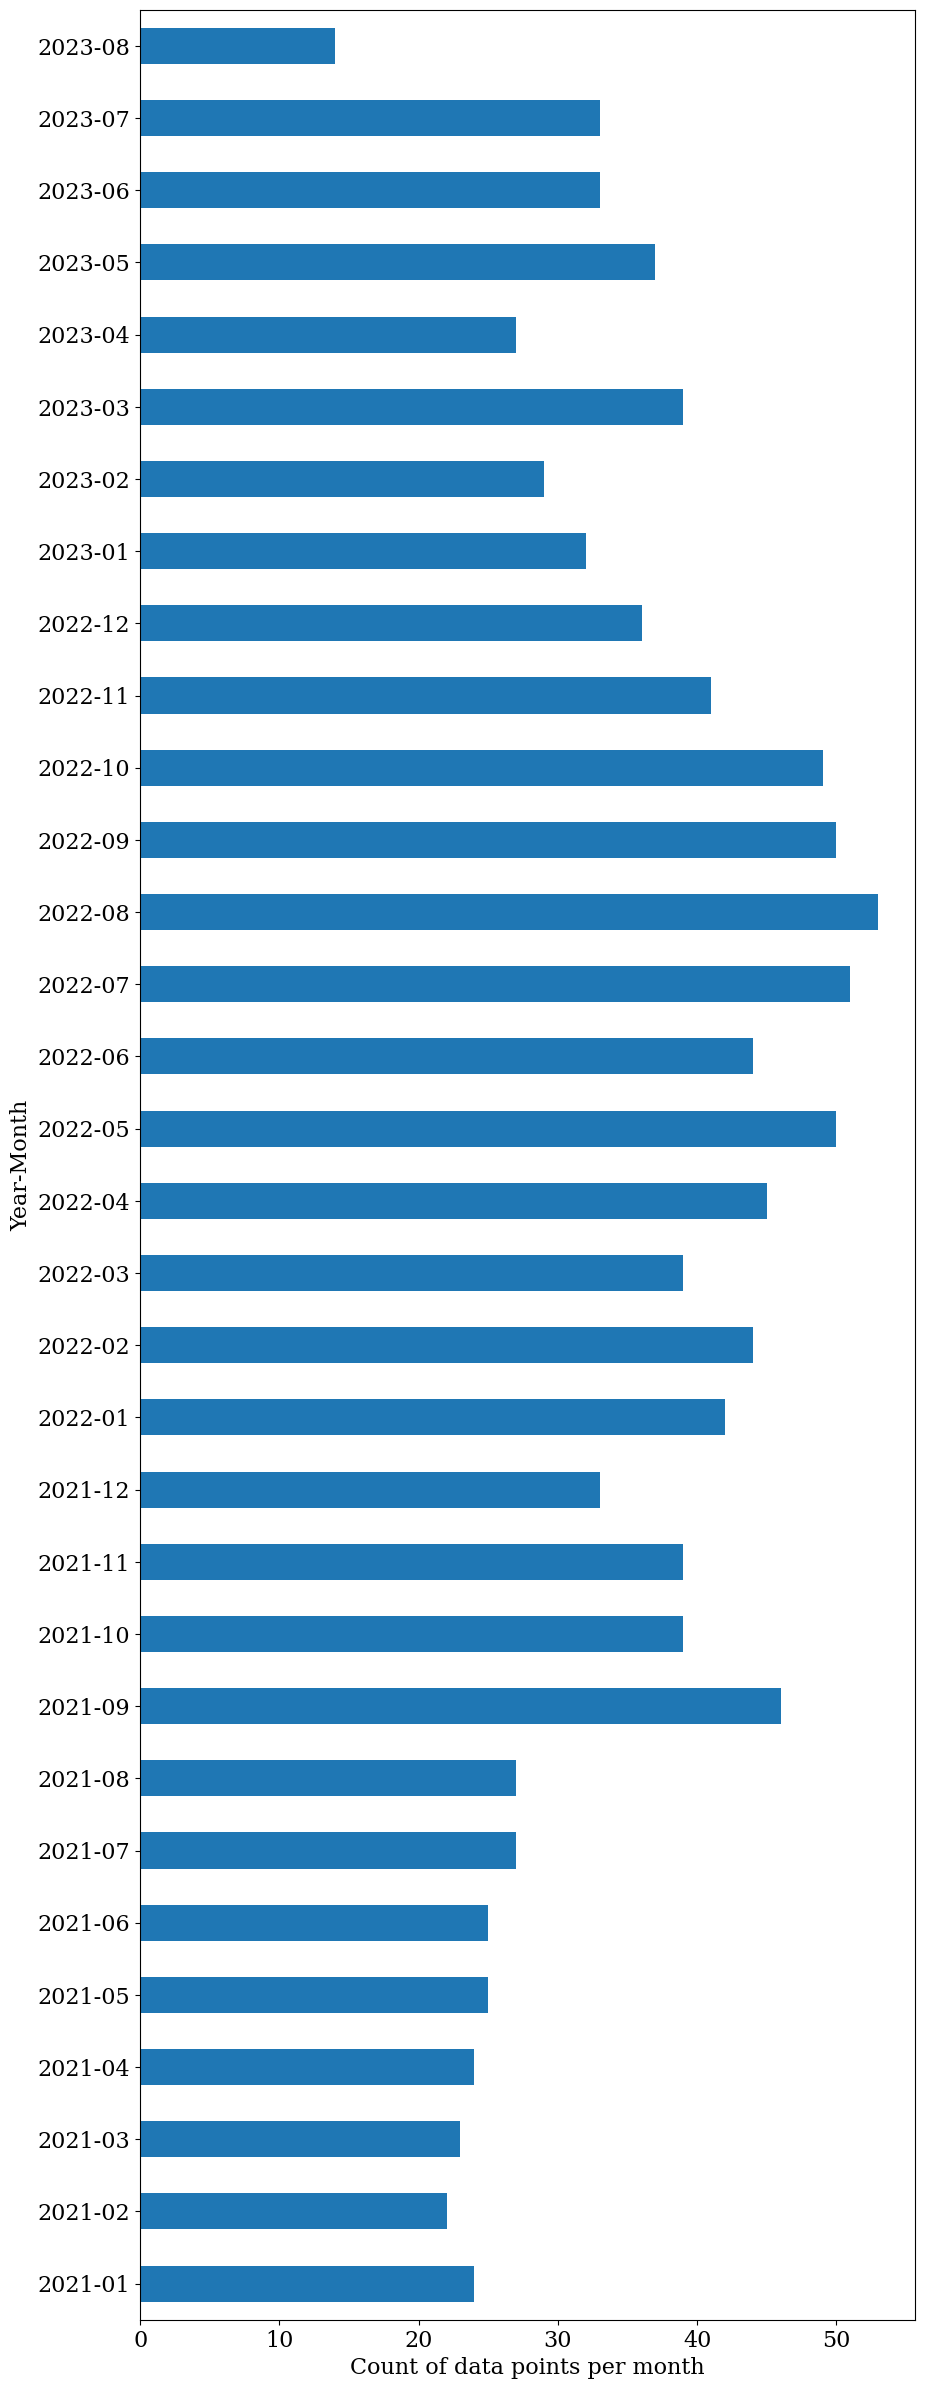

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 14
2022-8 has the maximum number of days with samples - 53


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 29, 2022: 45, 2023: 30}

Mean number of observations - all years
35


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  764.000000
mean     1.494764
std      0.500300
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      2.000000

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
1           386
2           378
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
176  2021      8    9         2
180  2021      8   16         2
187  2021      8   24         2
190  2021      8   27         2
193  2021      9    1         2
..    ...    ...  ...       ...
746  2023      7   24         2
748  2023      7   26         2
750  2023      7   28         2
755  2023      8    4         2
759  2023      8    9         2

[378 rows x 4 columns]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

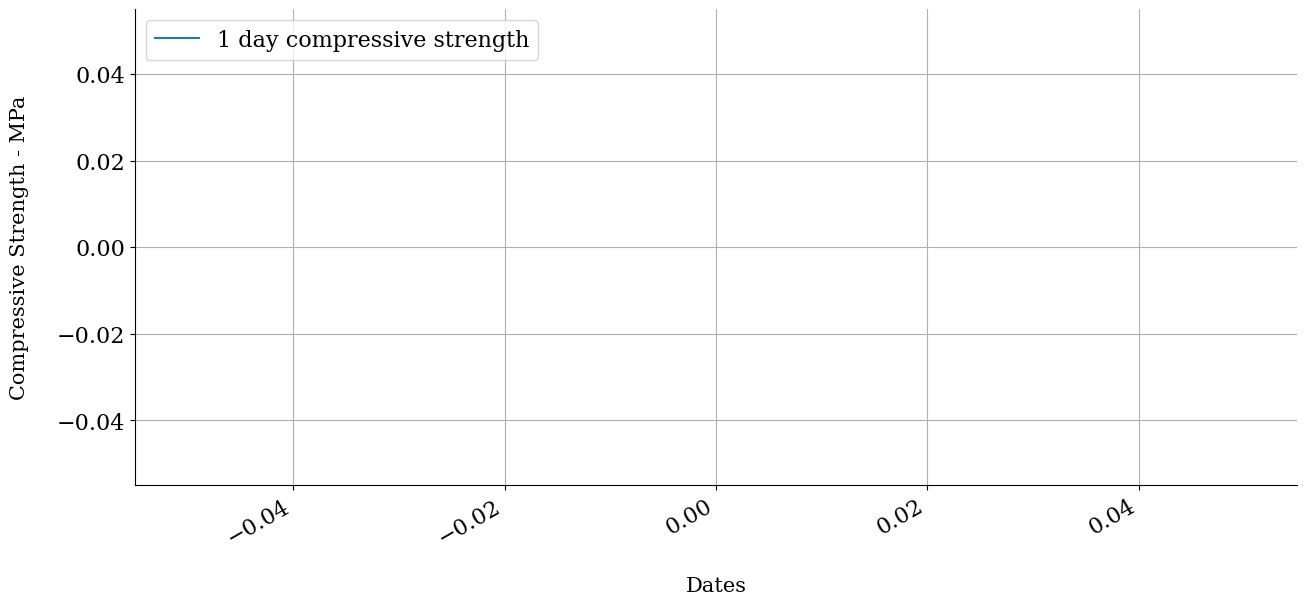

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

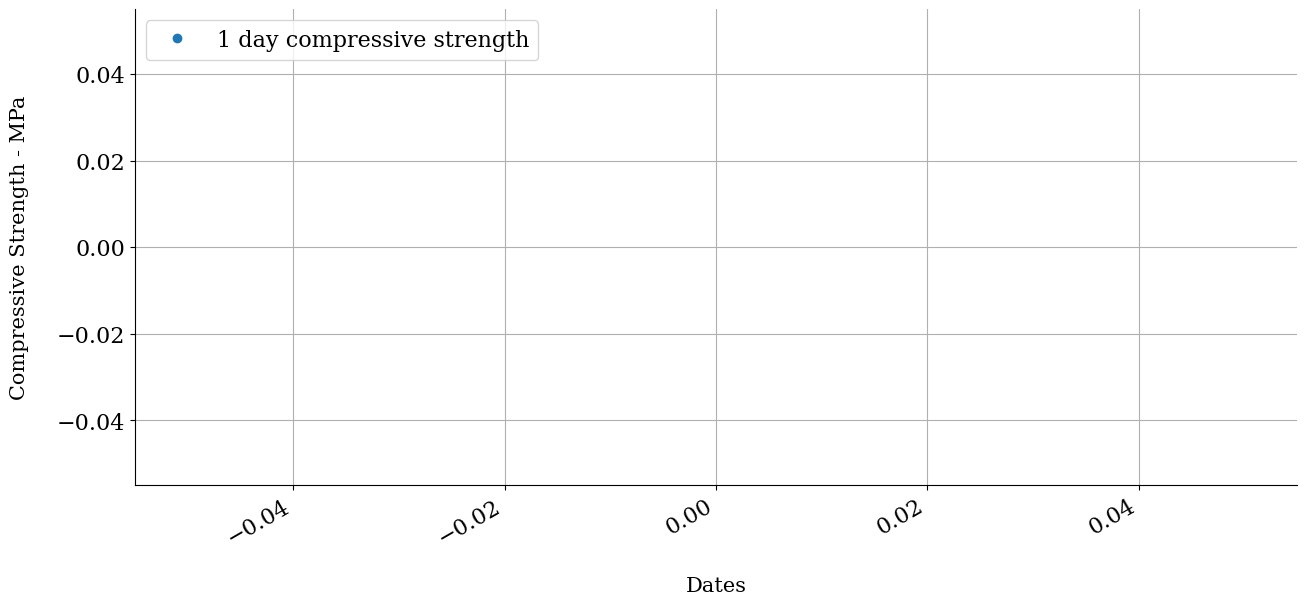

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

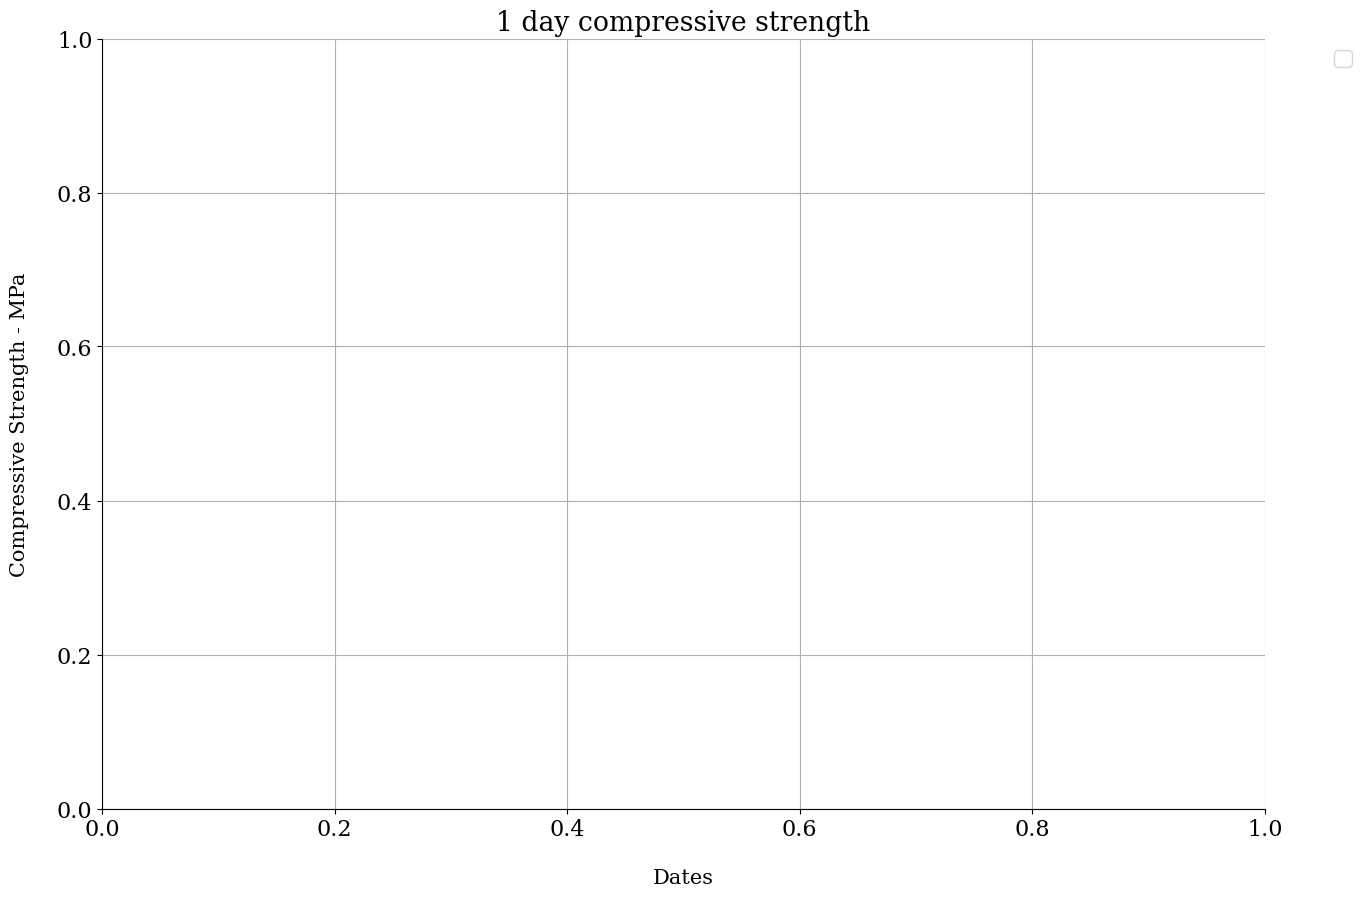

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

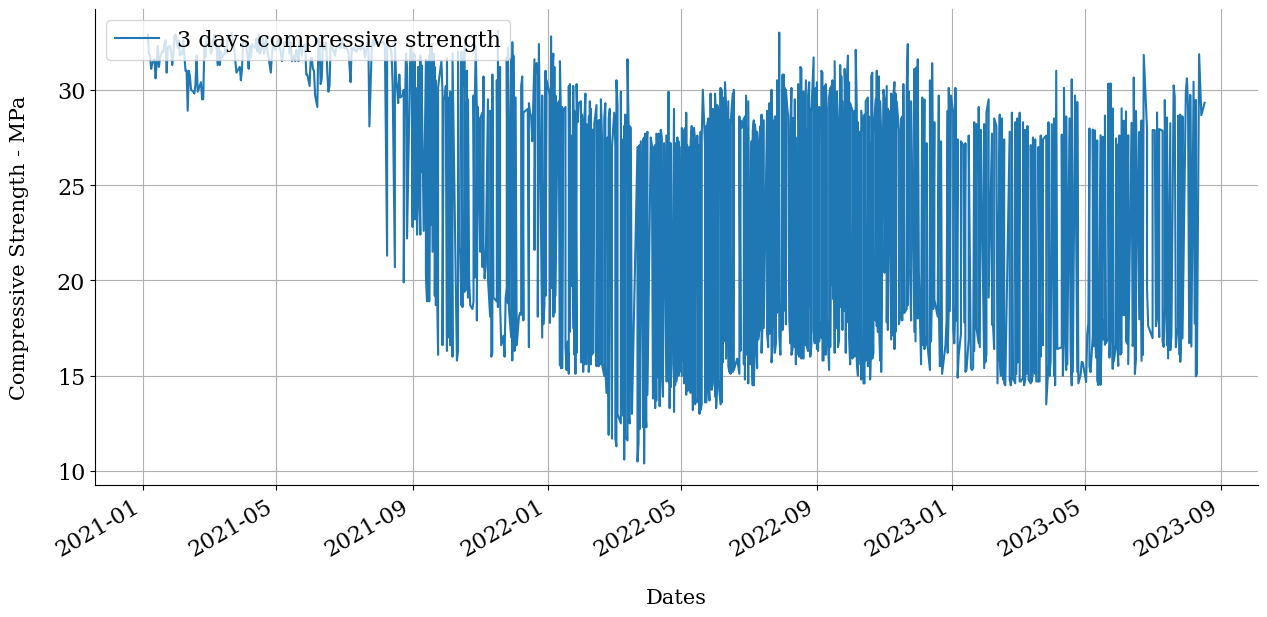

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

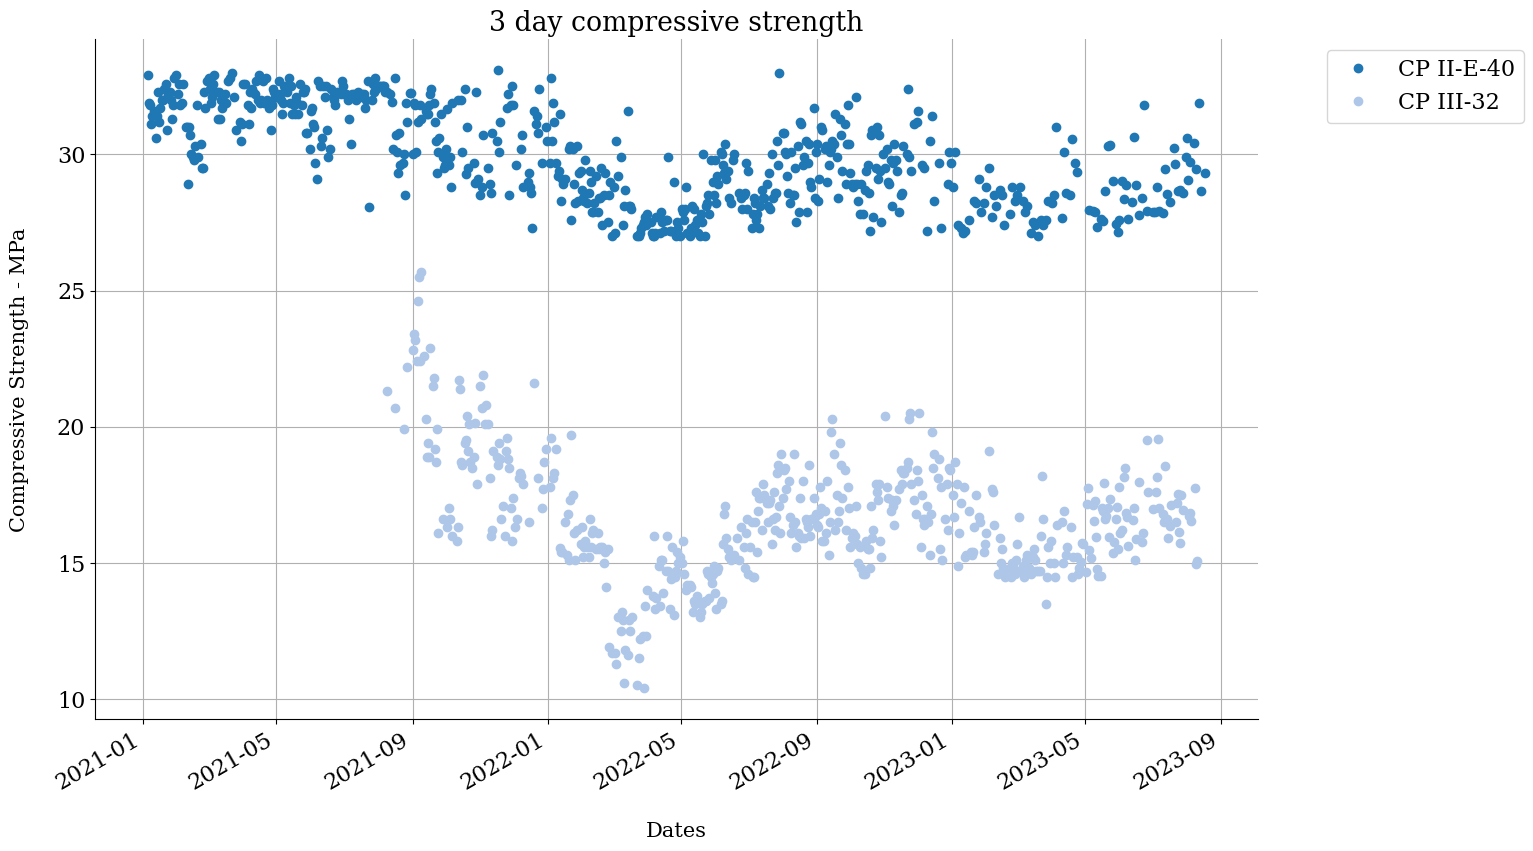

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

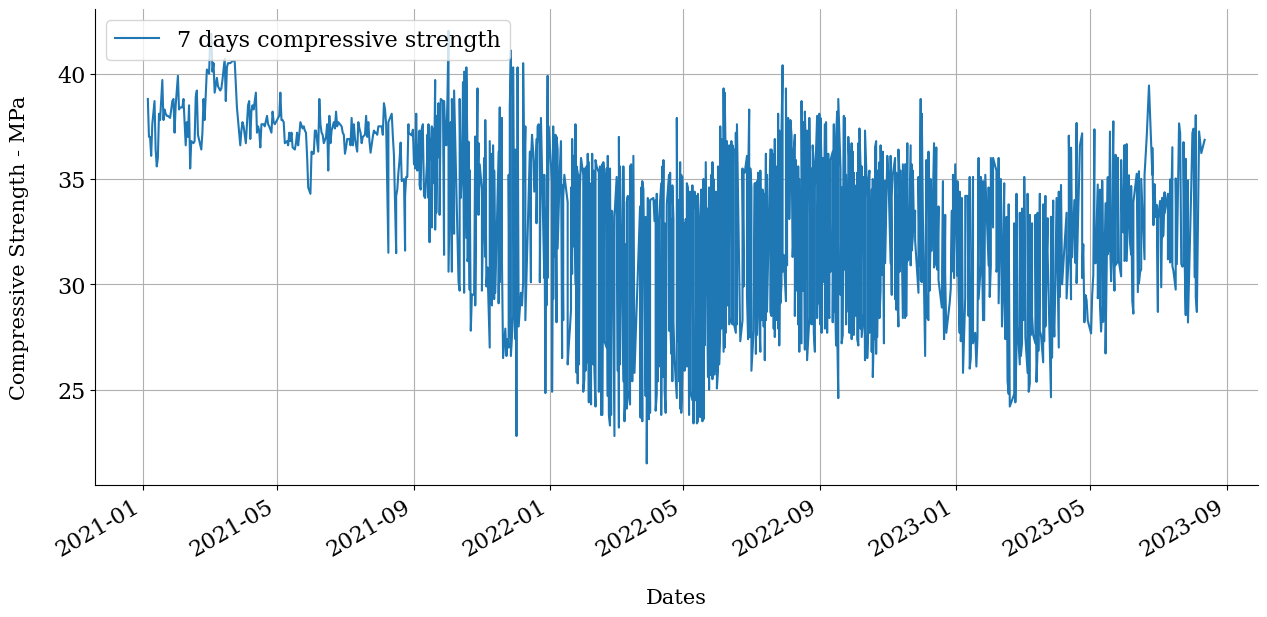

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

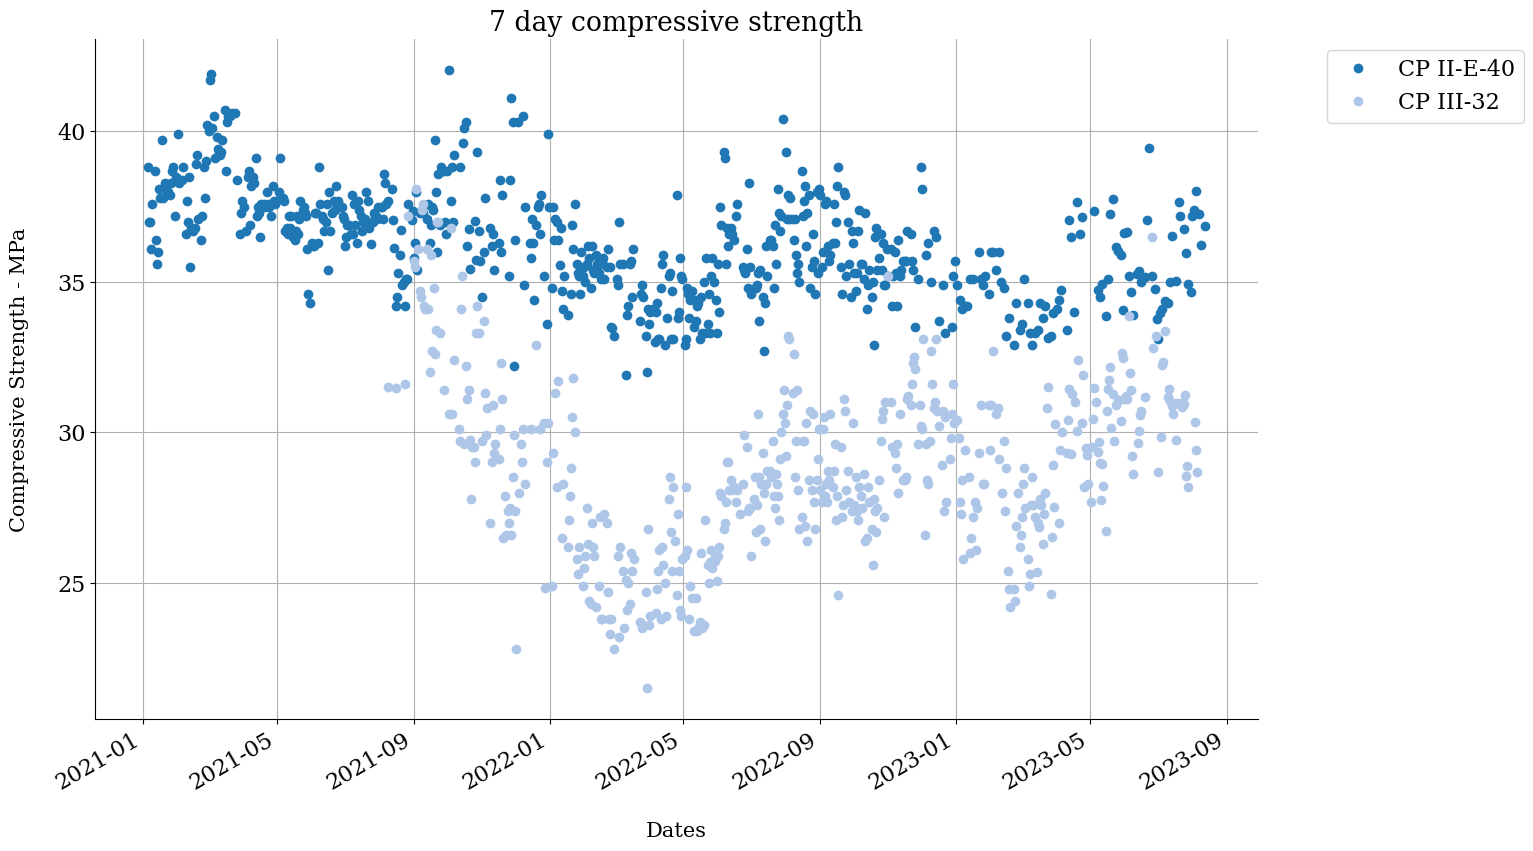

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

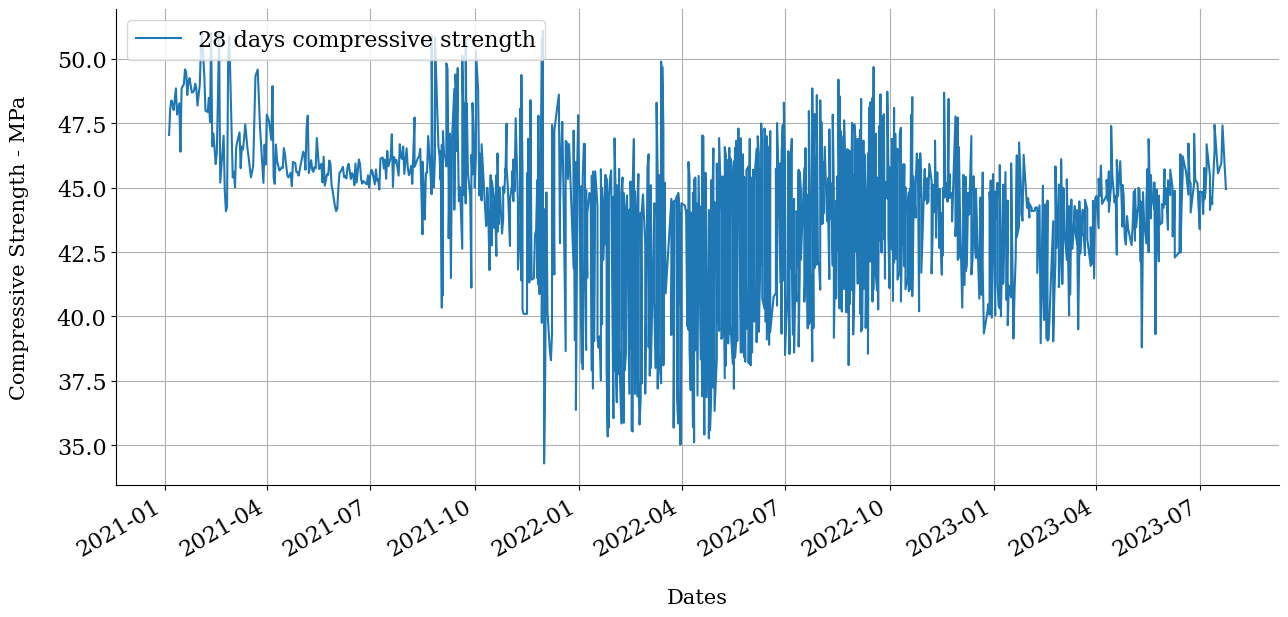

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

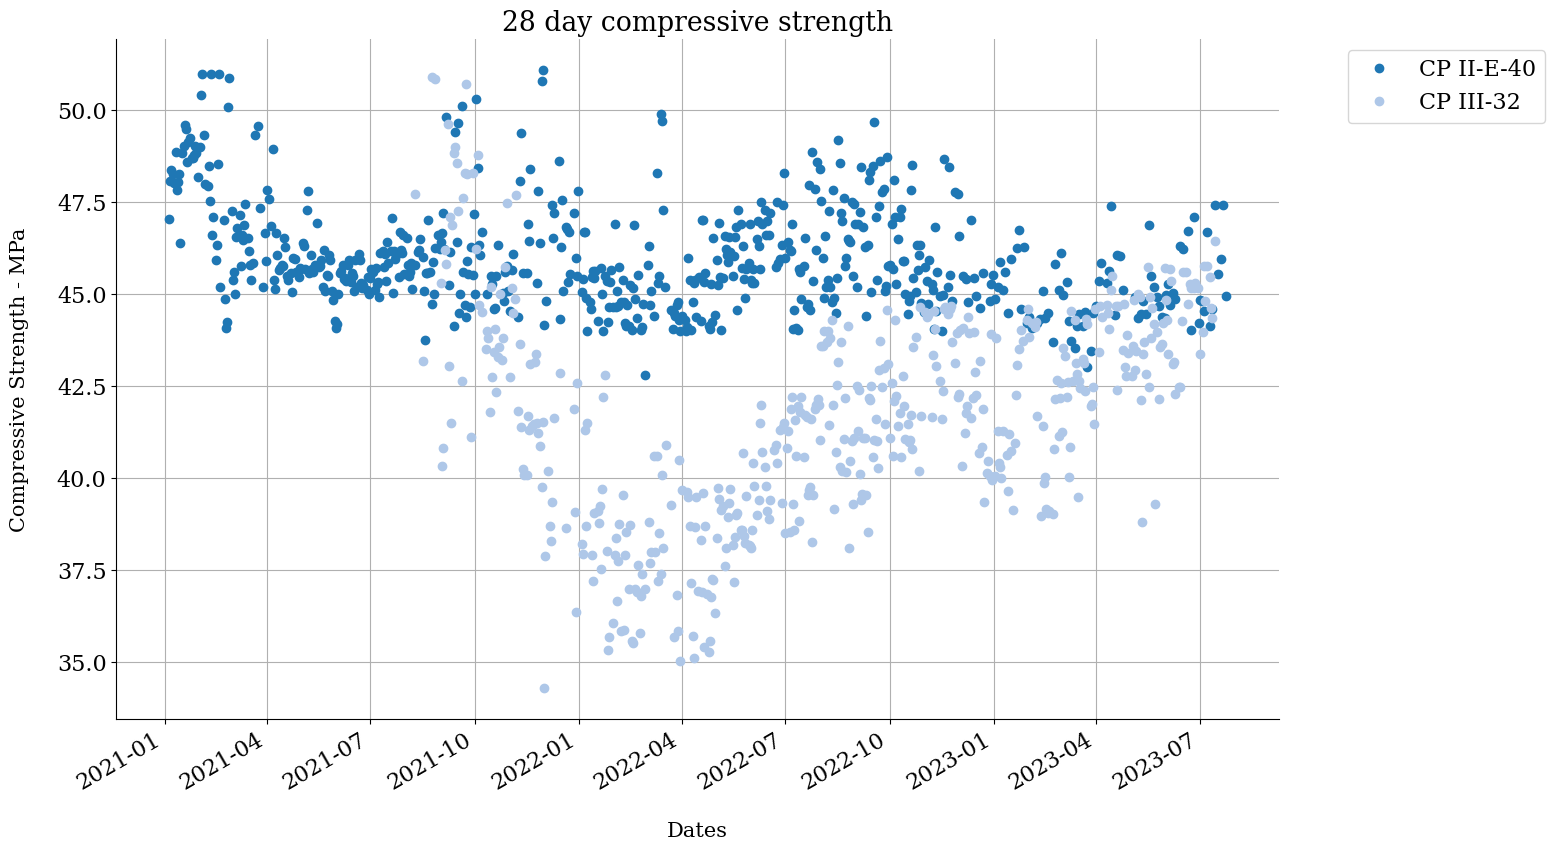

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()